In [92]:
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import numpy as np
from functools import reduce

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

path = r'./data' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    print(len(df))
    li.append(df)
frame = pd.concat(li, axis=0, ignore_index=True)

frame = pd.read_csv("./data/Fat_Supply_Quantity_Data.csv", index_col=None, header=0)

#frame = frame.drop(columns = ["Unit (all except Population)", "Categories", "Items", "Undernourished"])
frame = frame.drop(columns = ["Unit (all except Population)", "Undernourished"])
#Simon à détécter
#Relier nombre population 
#Using miss rangeer

#frame = pd.get_dummies(frame)

data_covid = ['Confirmed', 'Deaths', 'Recovered', 'Active', 'Population']
data_covid = ["Recovered_percent",'Confirmed', 'Deaths', 'Recovered', 'Active']
data_covid = ["Recovered_percent"]
data_food =  set(frame.columns) - set(data_covid)


print(len(frame))
frame = frame.dropna()
print(len(frame))

170
170
23
170
170
170
160


In [102]:
frame["Confirmed_finish"] = frame["Confirmed"] - frame["Active"]
frame["Recovered_percent"] = frame["Recovered"] * 100 / frame["Confirmed_finish"] 
frame["Deaths_percent"] = frame["Deaths"] * 100 / frame["Confirmed_finish"] 
print(len(frame))
frame = frame.dropna()
print(len(frame))

160
159


In [103]:
name_y = "Deaths_percent"

In [104]:
frame.head()

Country  Alcoholic Beverages  Animal Products  Animal fats  Aquatic Products, Other  Cereals - Excluding Beer    Eggs  Fish, Seafood  Fruits - Excluding Wine     Meat  Miscellaneous  Milk - Excluding Butter  Offals  Oilcrops  Pulses  Spices  Starchy Roots  Stimulants  Sugar Crops  Sugar & Sweeteners  Treenuts  Vegetal Products  Vegetable Oils  Vegetables  Obesity  Confirmed    Deaths  Recovered    Active  Population  Confirmed_finish  Recovered_percent  Deaths_percent
0          Afghanistan                  0.0          21.6397       6.2224                      0.0                    8.0353  0.6859         0.0327                   0.4246   6.1244         0.0163                   8.2803  0.3103    1.0452  0.1960  0.2776         0.0490      0.0980          0.0                 0.0    0.7513           28.3684         17.0831      0.3593      4.5   0.112646  0.004226   0.090667  0.017753  38928000.0          0.094893          95.546833        4.453167
1              Albania                  0.0          32.0002       3.4172                      0.0                    2.6734  1.6448         0.1445                   0.6418   8.7428         0.0170                  17.7576  0.2933    3.1622  0.1148  0.0000         0.0510      0.5270          0.0                 0.0    0.9181           17.9998          9.2443      0.6503     22.3   1.051339  0.022763   0.500916  0.527660   2838000.0          0.523679          95.653344        4.346656
2              Algeria                  0.0          14.4175       0.8972                      0.0                    4.2035  1.2171         0.2008                   0.5772   3.8961         0.0439                   8.0934  0.1067    1.1983  0.2698  0.1568         0.1129      0.2886          0.0                 0.0    0.8595           35.5857         27.3606      0.5145     26.6   0.159229  0.004973   0.104439  0.049816  44357000.0          0.109412          95.454545        4.545455
3               Angola                  0.0          15.3041       1.3130                      0.0                    6.5545  0.1539         1.4155                   0.3488  11.0268         0.0308                   1.2309  0.1539    3.9902  0.3282  0.0103         0.7078      0.1128          0.0                 0.0    0.0308           34.7010         22.4638      0.1231      6.8   0.042808  0.001021   0.020365  0.021422  32522000.0          0.021386          95.226456        4.773544
4  Antigua and Barbuda                  0.0          27.7033       4.6686                      0.0                    3.2153  0.3872         1.5263                   1.2177  14.3202         0.0898                   6.6607  0.1347    1.3579  0.0673  0.3591         0.0449      1.0549          0.0                 0.0    0.2020           22.2995         14.4436      0.2469     19.1   0.141837  0.004082   0.129592  0.008163     98000.0          0.133673          96.946565        3.053435

In [105]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.tree import DecisionTreeRegressor


In [106]:
name_y

'Deaths_percent'

import time 
time.sleep(4600)
!poweroff

In [107]:
sns.pairplot(frame[frame.columns[0:10]])
plt.show()

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7f73186093a0> (for post_execute):


KeyboardInterrupt: 

In [108]:
val = np.median(frame["Recovered_percent"])
frame["Recovered_percent"] = frame["Recovered_percent"].apply(lambda x: val if x < 85 else x)

In [109]:
frame.Obesity

0       4.5
1      22.3
2      26.6
3       6.8
4      19.1
5      28.5
6      20.9
7      30.4
8      21.9
9      19.9
10     32.1
11      3.4
12     24.8
13     26.6
14     24.5
15     22.4
16      8.2
17     18.7
18     19.4
19     16.1
20     22.3
21     27.4
22      4.5
23     10.6
24      3.5
25      9.5
27      6.3
28      4.8
30      6.6
31     22.1
32      8.4
33     25.7
34      9.0
35     27.1
36     26.7
37     22.6
38     28.5
39     21.3
40     12.2
41     28.2
42     26.9
43     19.3
44     31.1
45     22.7
46     23.8
47     13.5
48      3.6
49     30.0
50     24.9
51     23.2
53     13.4
54      8.7
55     23.3
56     25.7
57      9.7
58     27.4
59     20.2
60     18.8
61      6.6
62      8.2
63     19.2
64     20.5
65     19.4
66     28.6
67     23.1
68      3.8
69      6.9
70     25.5
71     27.4
72     26.9
73     26.7
74     22.9
75     24.4
76      4.4
77     33.4
78     21.3
79      6.0
82      4.9
83     37.0
84     15.4
85      4.5
86     25.7
87     31.3
88  

In [111]:
val = np.median(frame[name_y])
frame[name_y] = frame[name_y].apply(lambda x: val if x > 20 else x)

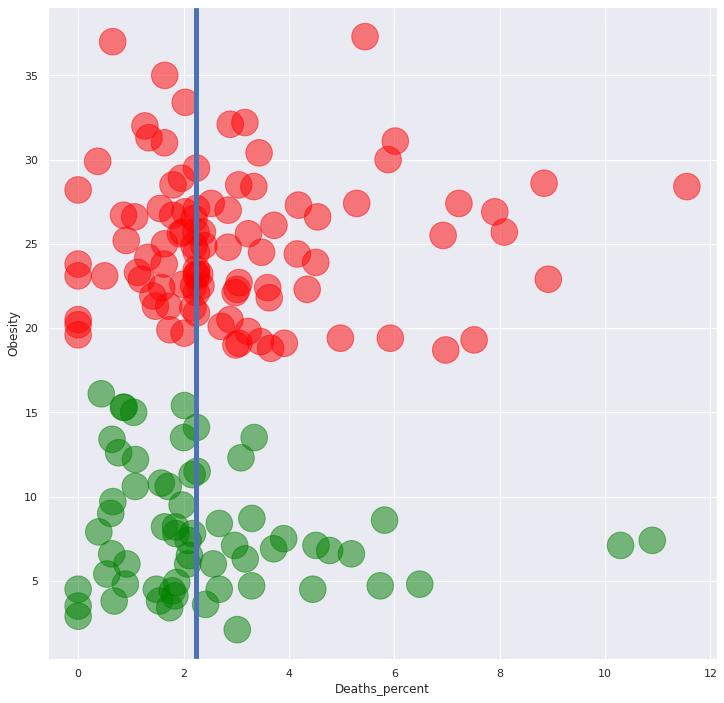

In [112]:
colors =np.array([0.66654074, 0.078509  , 0.3789459 , 0.34246136, 0.59422087,
       0.54660746, 0.20824018, 0.66346243, 0.89022992, 0.3757465 ,
       0.11074908, 0.26192658, 0.99308049, 0.02374416, 0.04194588,
       0.86921167, 0.70723466, 0.4122623 , 0.67829339, 0.53117971,
       0.81872832, 0.55985078, 0.23091651, 0.80834056, 0.87656494,
       0.13828882, 0.6798708 , 0.26878059, 0.79344377, 0.5360809 ,
       0.44215873, 0.19388534, 0.77904159, 0.35474825, 0.12516915,
       0.23588744, 0.72637308, 0.70550326, 0.16829918, 0.80472124,
       0.35918313, 0.38149351, 0.04377072, 0.52021756, 0.29301156,
       0.1337082 , 0.15680414, 0.79004612, 0.7845808 , 0.54615125,
       0.78751217, 0.5532651 , 0.92921845, 0.1628803 , 0.36951424,
       0.10987379, 0.18065906, 0.11596523, 0.34708351, 0.17012639,
       0.7264041 , 0.95645805, 0.50375769, 0.66814332, 0.95500886,
       0.70236058, 0.29720138, 0.27343176, 0.39602408, 0.05508308,
       0.89278069, 0.83781536, 0.08731063, 0.7450199 , 0.78191333,
       0.33777009, 0.63135599, 0.52650956, 0.53372505, 0.13362415,
       0.28191204, 0.40248931, 0.06316108, 0.6576691 , 0.40707669,
       0.53659566, 0.01546504, 0.07856901, 0.35995435, 0.78074858,
       0.04178477, 0.16691299, 0.03303864, 0.09044799, 0.46210073,
       0.27266884, 0.93931454, 0.56129402, 0.22353442, 0.03931647,
       0.05414182, 0.35241128, 0.19593138, 0.84054461, 0.76069135,
       0.97495209, 0.96649181, 0.03573794, 0.6782378 , 0.23740826,
       0.89143632, 0.87756697, 0.34917607, 0.6999136 , 0.35921582,
       0.15468295, 0.93378958, 0.24471899, 0.57368791, 0.23972871,
       0.33489817, 0.00293228, 0.99807623, 0.26975147, 0.6717724 ,
       0.68303652, 0.91652069, 0.61831527, 0.85717314, 0.25077092,
       0.60295297, 0.29409813, 0.81746265, 0.92512432, 0.23275404,
       0.88818224, 0.24060323, 0.64922721, 0.34752267, 0.18224535,
       0.24904026, 0.1495855 , 0.63501956, 0.93844053, 0.48264971,
       0.50083433, 0.11160529, 0.41859574, 0.64319905, 0.41146062,
       0.81806787, 0.77030899, 0.51423352, 0.29583886, 0.3755555 ,
       0.83800689, 0.17852682, 0.22778055, 0.7099781 ])
colors = ["green" if frame.iloc[i]["Obesity"] < np.mean(frame.Obesity) else "red"  for i in range(len(frame))]
area= np.pi * (15 )**2
a4_dims = (12,12)
fig, ax = plt.subplots(figsize=a4_dims)
ax.scatter(y= frame.Obesity, x=frame[name_y],s=area, c=colors, alpha=0.5)
ax.set_ylabel("Obesity")
ax.set_xlabel(name_y)
ax.axvline(np.median(frame.Deaths_percent), linewidth=5)


In [113]:
frame

Country  Alcoholic Beverages  Animal Products  Animal fats  Aquatic Products, Other  Cereals - Excluding Beer    Eggs  Fish, Seafood  Fruits - Excluding Wine     Meat  Miscellaneous  Milk - Excluding Butter  Offals  Oilcrops  Pulses  Spices  Starchy Roots  Stimulants  Sugar Crops  Sugar & Sweeteners  Treenuts  Vegetal Products  Vegetable Oils  Vegetables  Obesity  Confirmed    Deaths  Recovered    Active    Population  Confirmed_finish  Recovered_percent  Deaths_percent
0                           Afghanistan               0.0000          21.6397       6.2224                   0.0000                    8.0353  0.6859         0.0327                   0.4246   6.1244         0.0163                   8.2803  0.3103    1.0452  0.1960  0.2776         0.0490      0.0980       0.0000              0.0000    0.7513           28.3684         17.0831      0.3593      4.5   0.112646  0.004226   0.090667  0.017753  3.892800e+07          0.094893          95.546833        4.453167
1                               Albania               0.0000          32.0002       3.4172                   0.0000                    2.6734  1.6448         0.1445                   0.6418   8.7428         0.0170                  17.7576  0.2933    3.1622  0.1148  0.0000         0.0510      0.5270       0.0000              0.0000    0.9181           17.9998          9.2443      0.6503     22.3   1.051339  0.022763   0.500916  0.527660  2.838000e+06          0.523679          95.653344        4.346656
2                               Algeria               0.0000          14.4175       0.8972                   0.0000                    4.2035  1.2171         0.2008                   0.5772   3.8961         0.0439                   8.0934  0.1067    1.1983  0.2698  0.1568         0.1129      0.2886       0.0000              0.0000    0.8595           35.5857         27.3606      0.5145     26.6   0.159229  0.004973   0.104439  0.049816  4.435700e+07          0.109412          95.454545        4.545455
3                                Angola               0.0000          15.3041       1.3130                   0.0000                    6.5545  0.1539         1.4155                   0.3488  11.0268         0.0308                   1.2309  0.1539    3.9902  0.3282  0.0103         0.7078      0.1128       0.0000              0.0000    0.0308           34.7010         22.4638      0.1231      6.8   0.042808  0.001021   0.020365  0.021422  3.252200e+07          0.021386          95.226456        4.773544
4                   Antigua and Barbuda               0.0000          27.7033       4.6686                   0.0000                    3.2153  0.3872         1.5263                   1.2177  14.3202         0.0898                   6.6607  0.1347    1.3579  0.0673  0.3591         0.0449      1.0549       0.0000              0.0000    0.2020           22.2995         14.4436      0.2469     19.1   0.141837  0.004082   0.129592  0.008163  9.800000e+04          0.133673          96.946565        3.053435
5                             Argentina               0.0000          30.3572       3.3076                   0.0000                    1.3316  1.5706         0.1664                   0.2091  19.2693         0.0000                   5.8512  0.1878    0.0640  0.0213  0.0213         0.1110      0.2475       0.0000              0.0000    0.1366           19.6449         17.3147      0.1878     28.5   2.951577  0.080100   2.548591  0.322886  4.537700e+07          2.628691          96.952854        3.047146
6                               Armenia               0.0000          29.6642       6.2619                   0.0000                    2.5068  1.6196         0.2218                   0.5468  10.8165         0.0361                  10.4709  0.2734    0.6602  0.0774  0.0103         0.0567      1.8002       0.0000              0.0000    0.9542           20.3384         12.8127      0.8717     20.9   4.075068  0.062212   2.708694  1.304161  2.956000e+06          2.770907          97

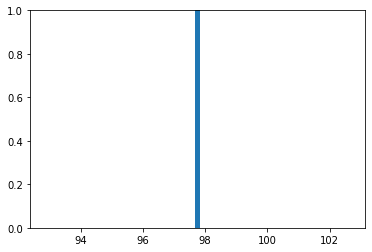

Alcoholic Beverages
Offals
Country


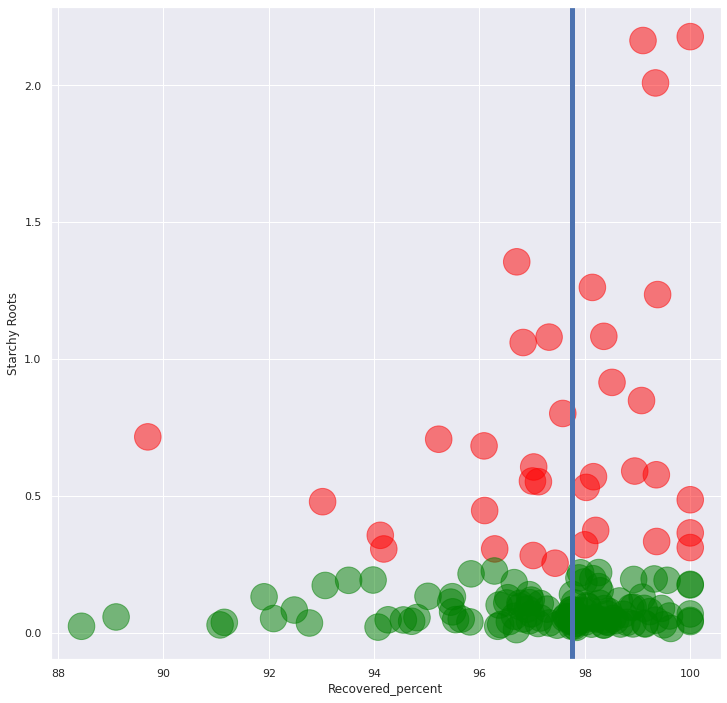

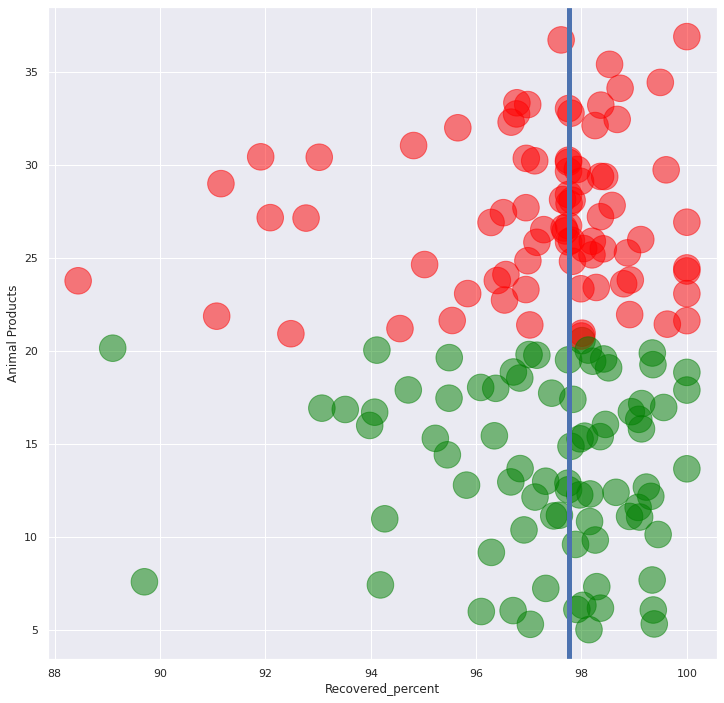

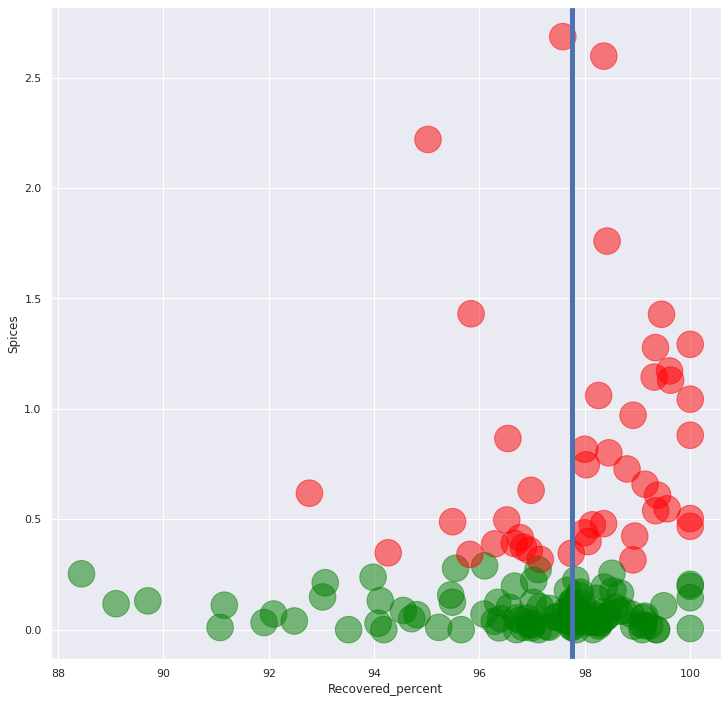

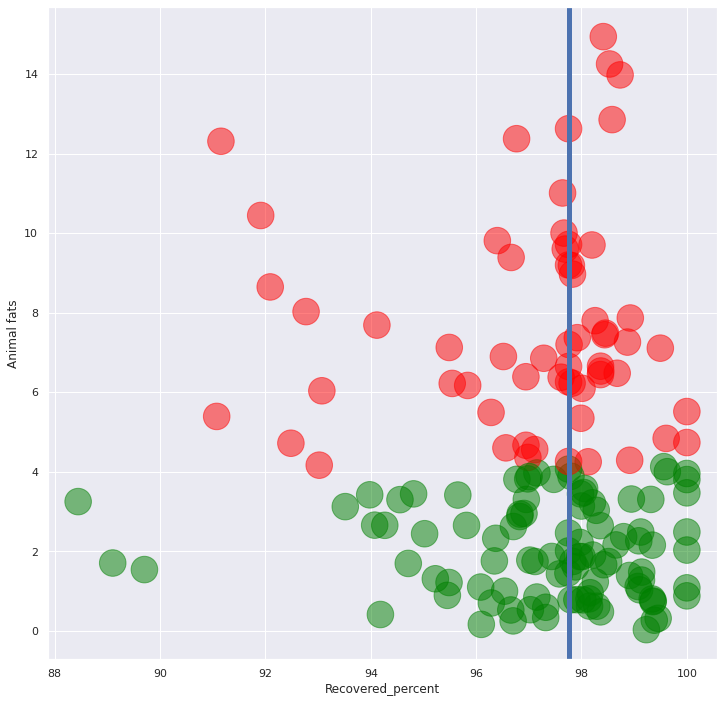

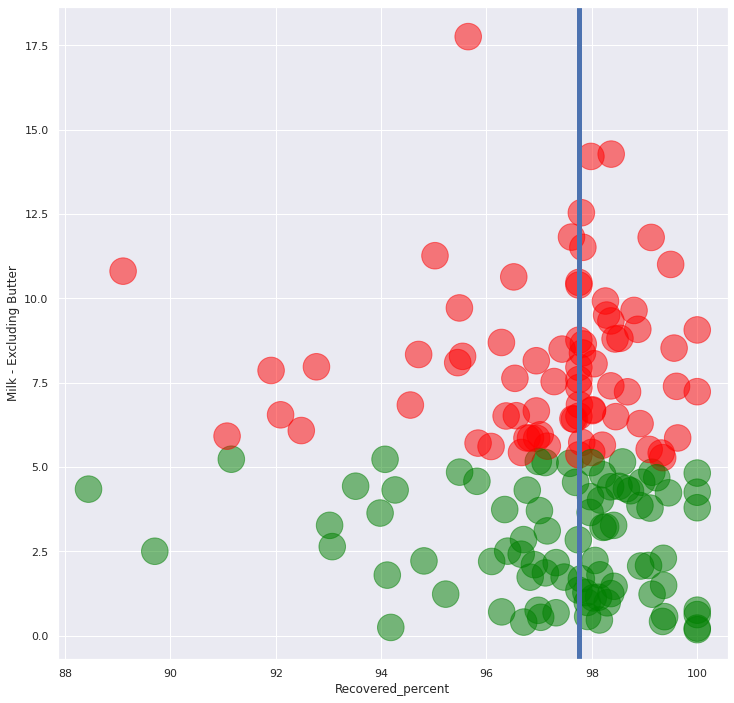

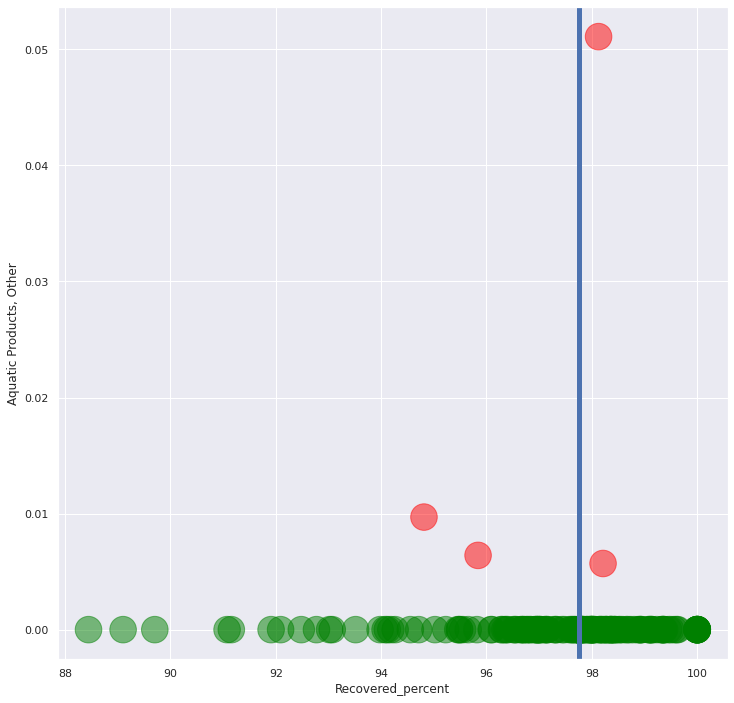

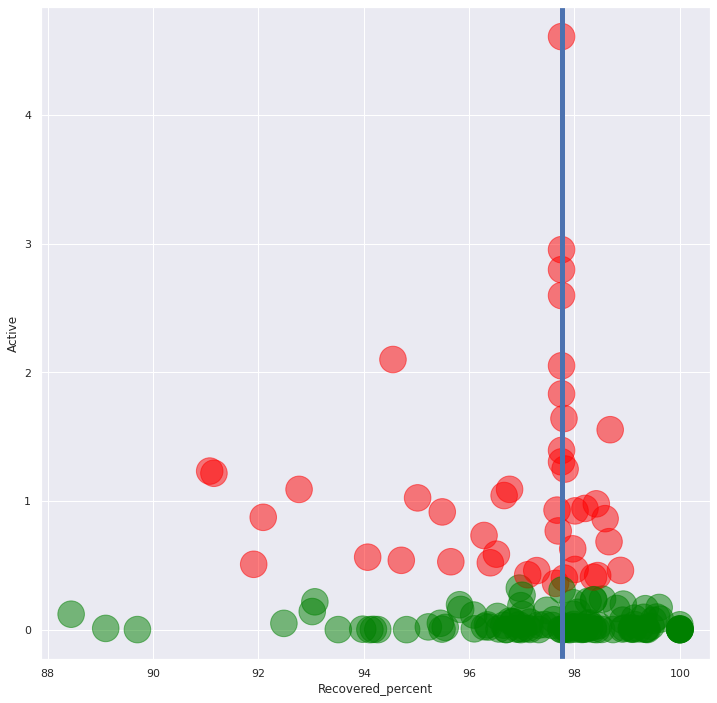

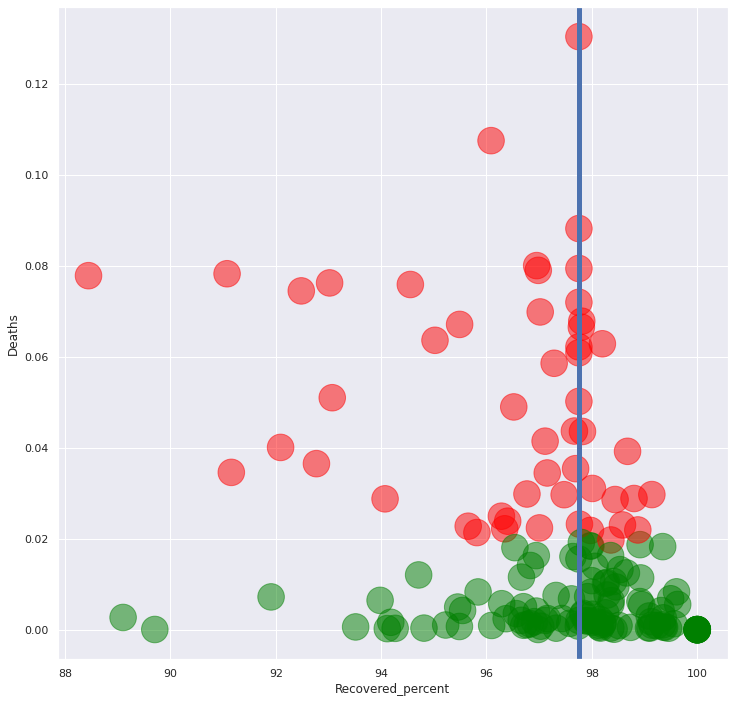

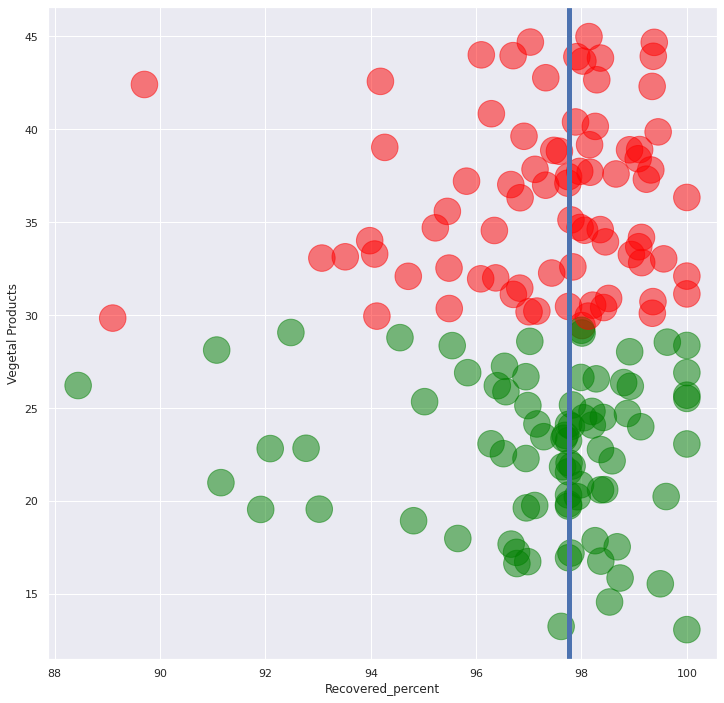

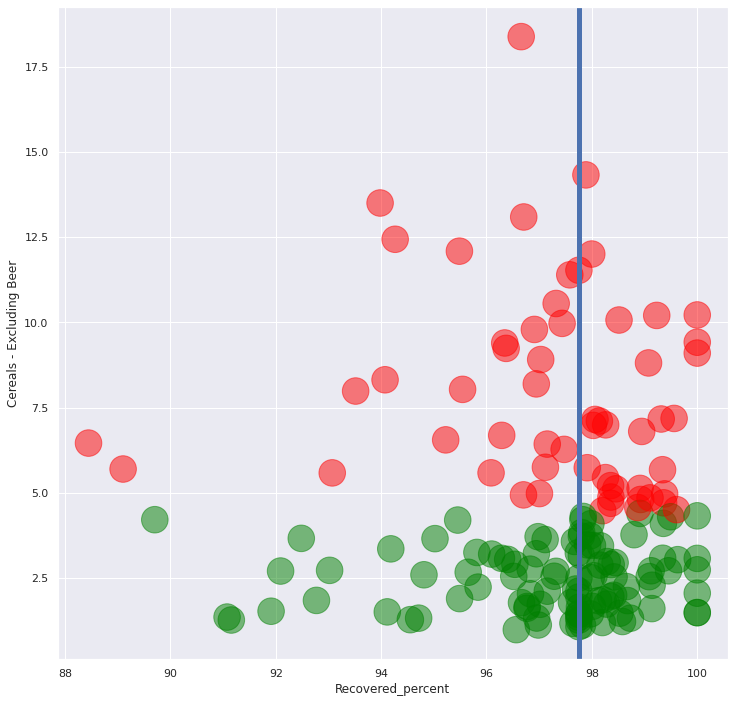

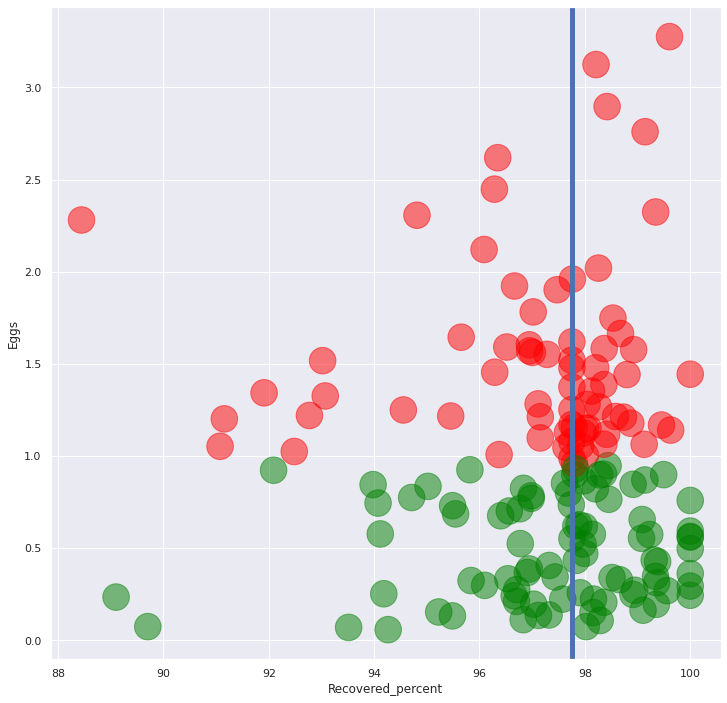

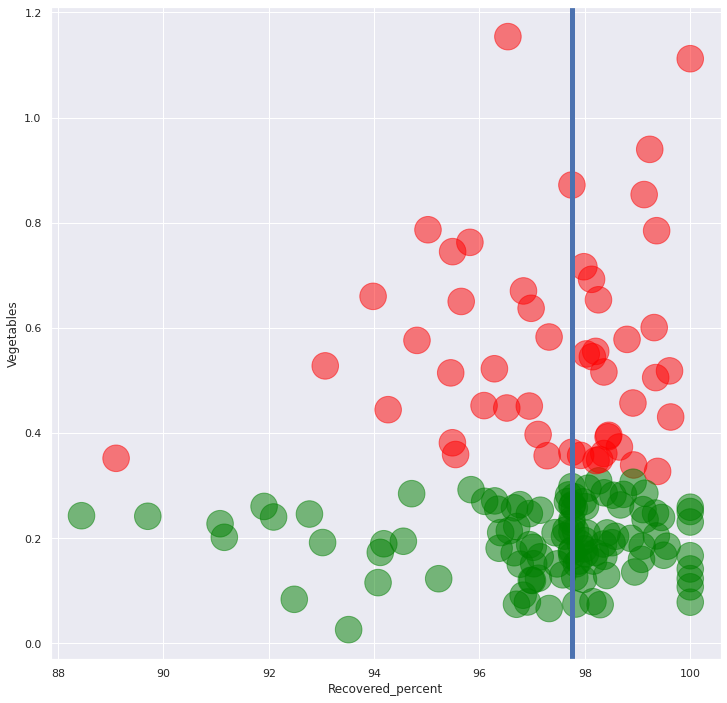

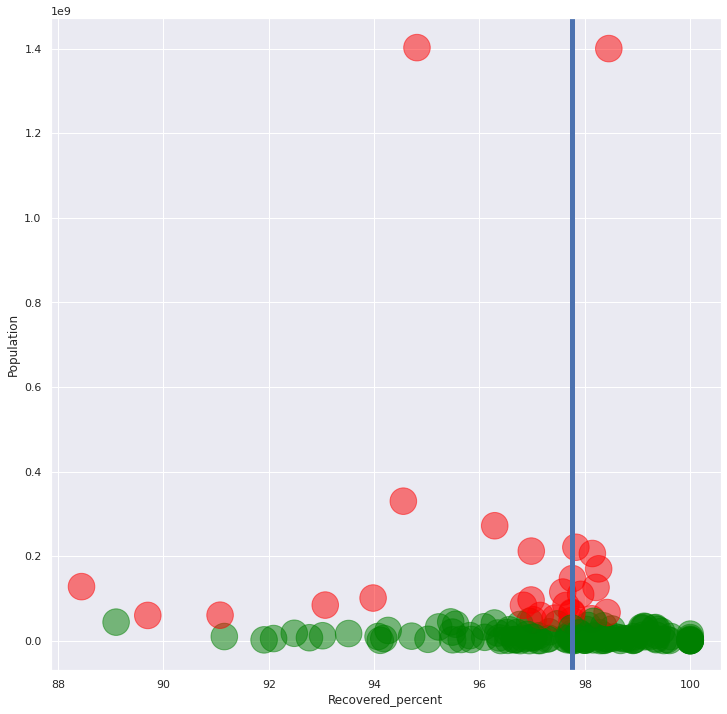

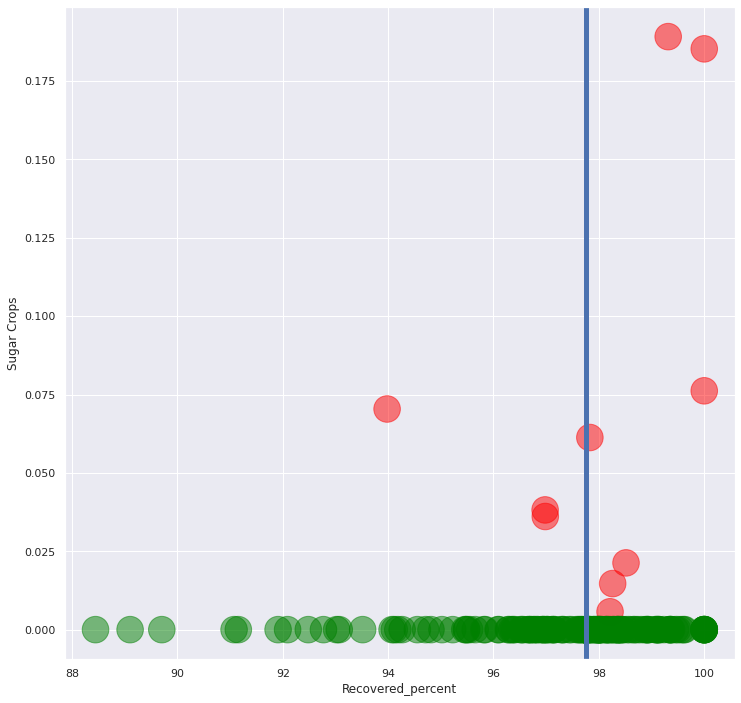

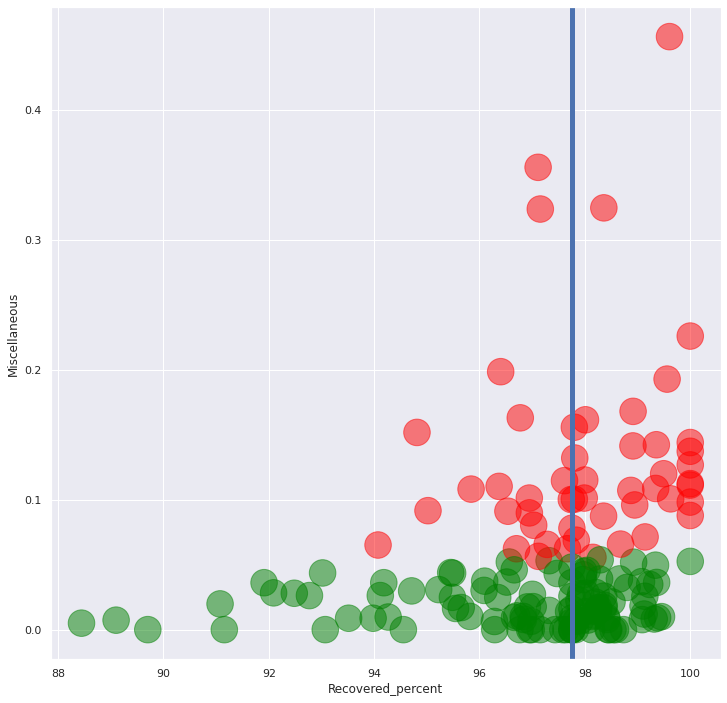

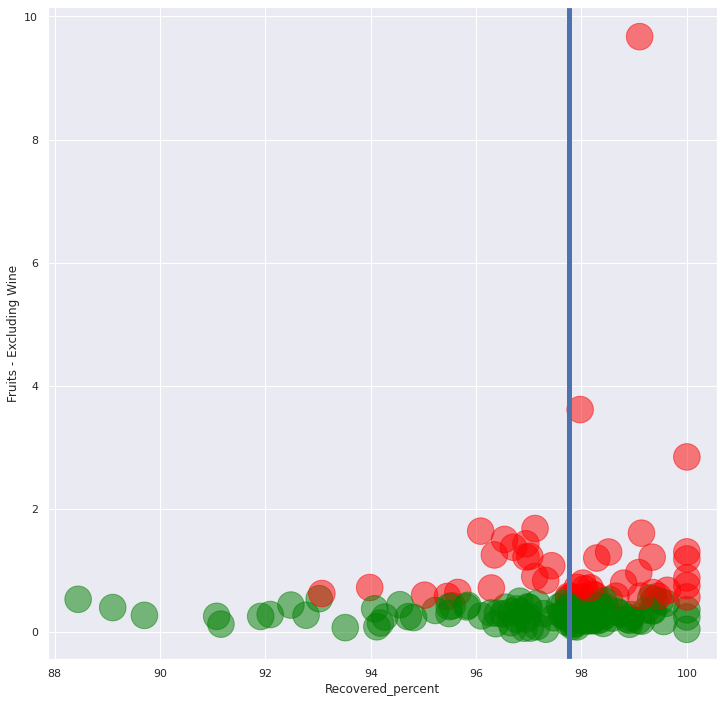

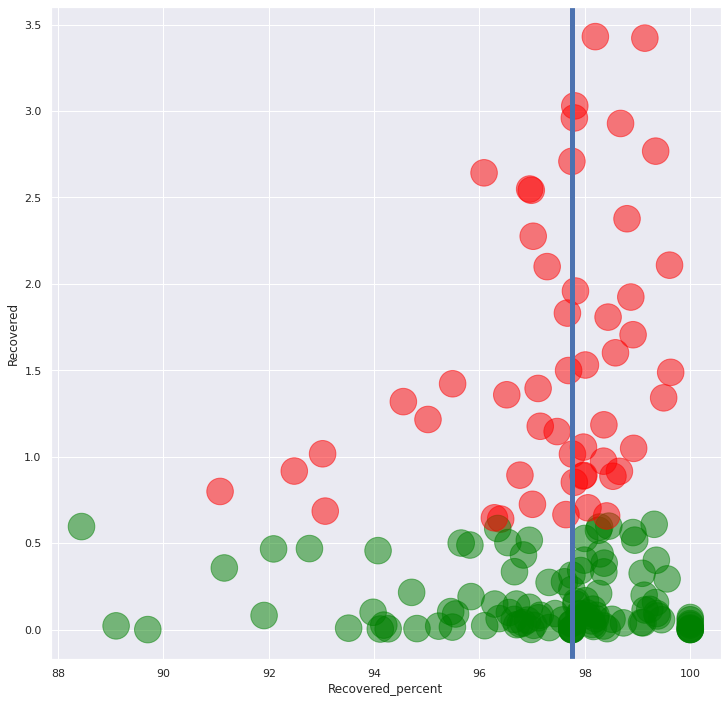

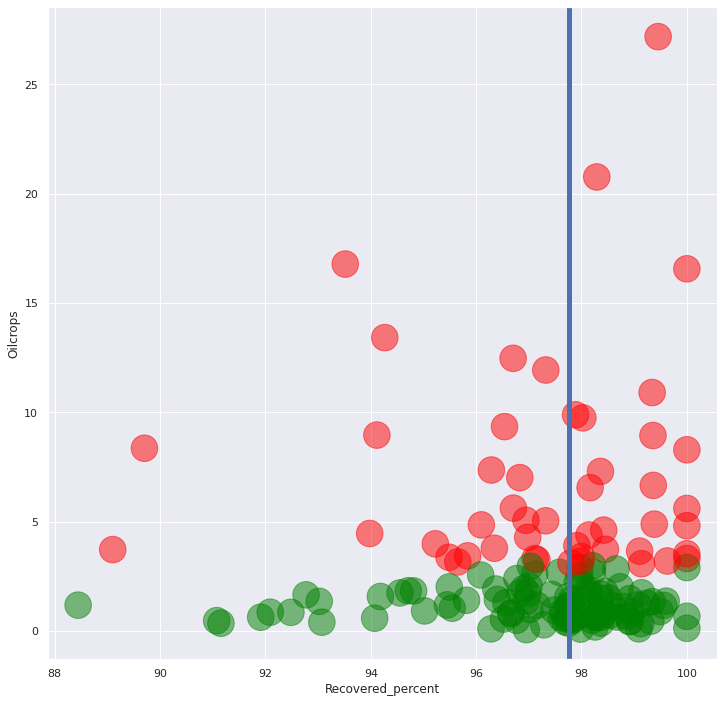

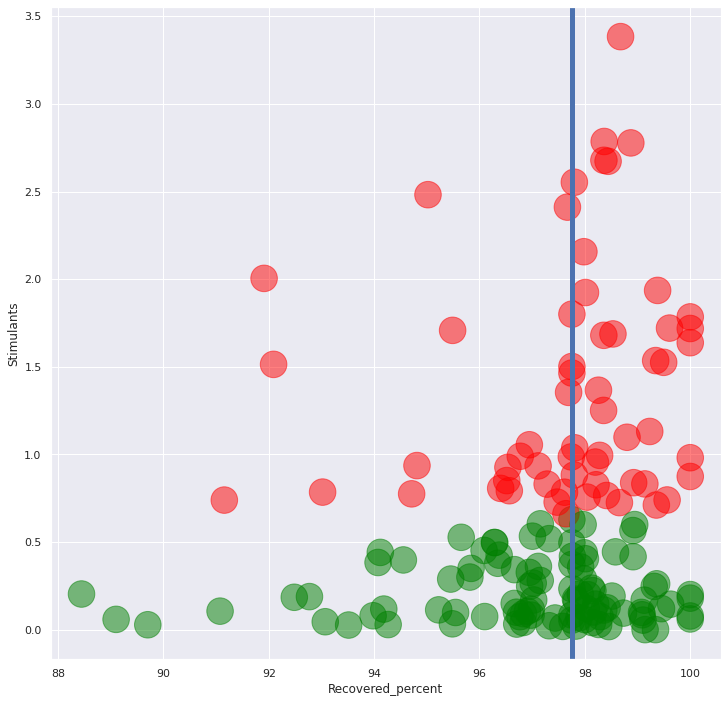

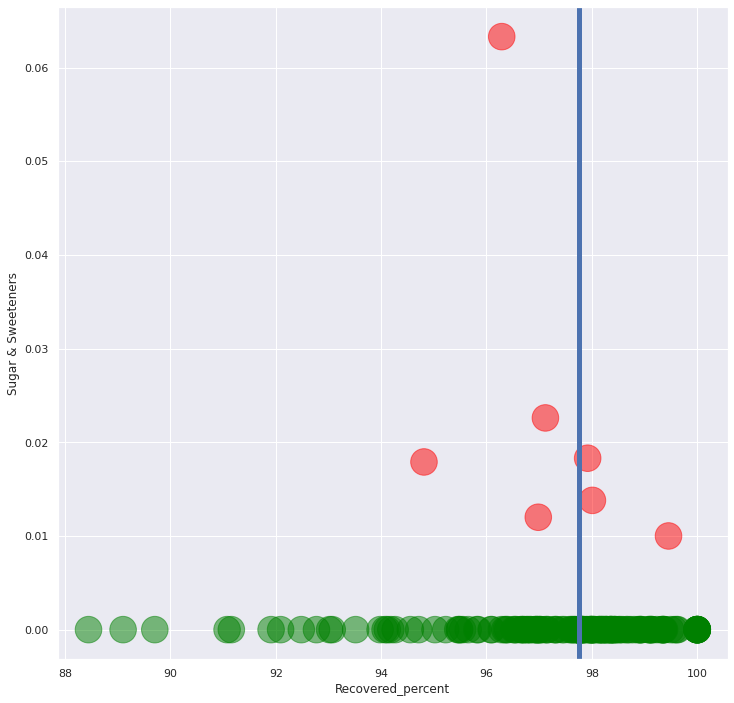

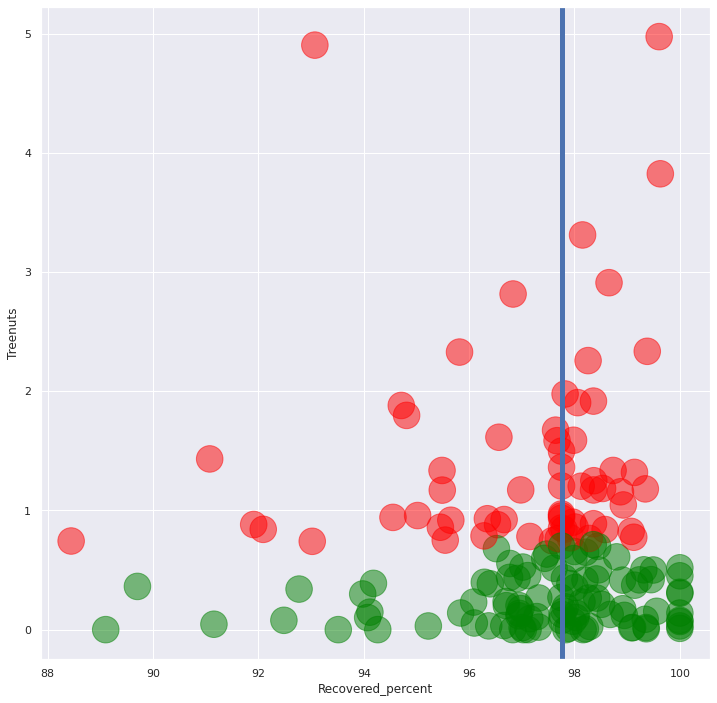

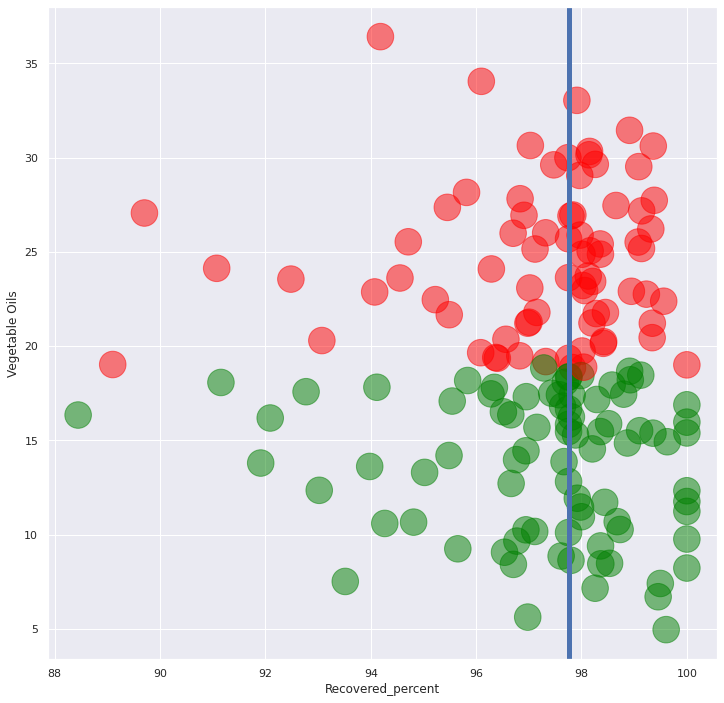

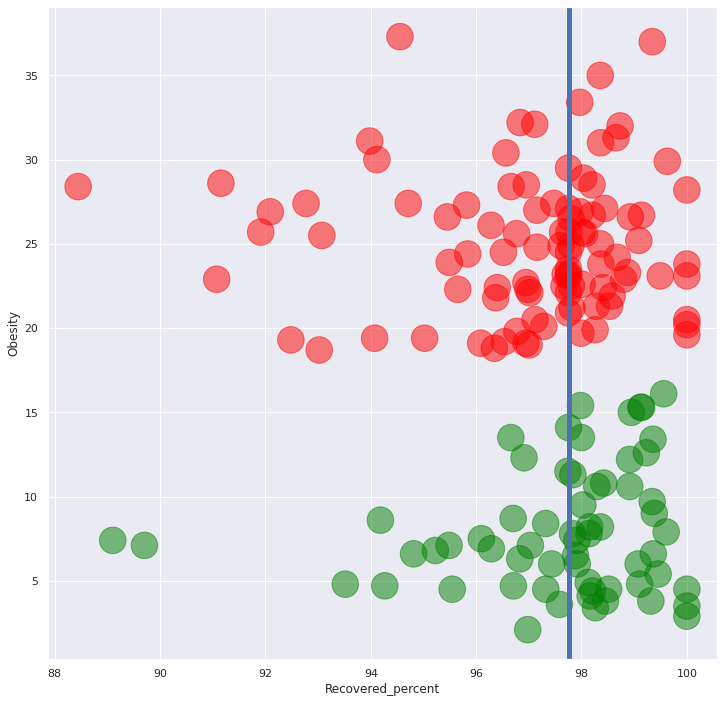

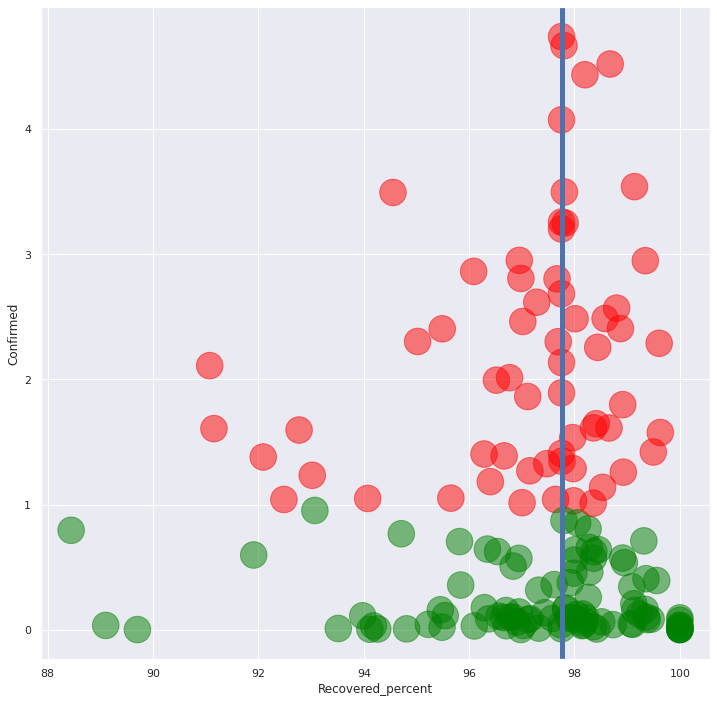

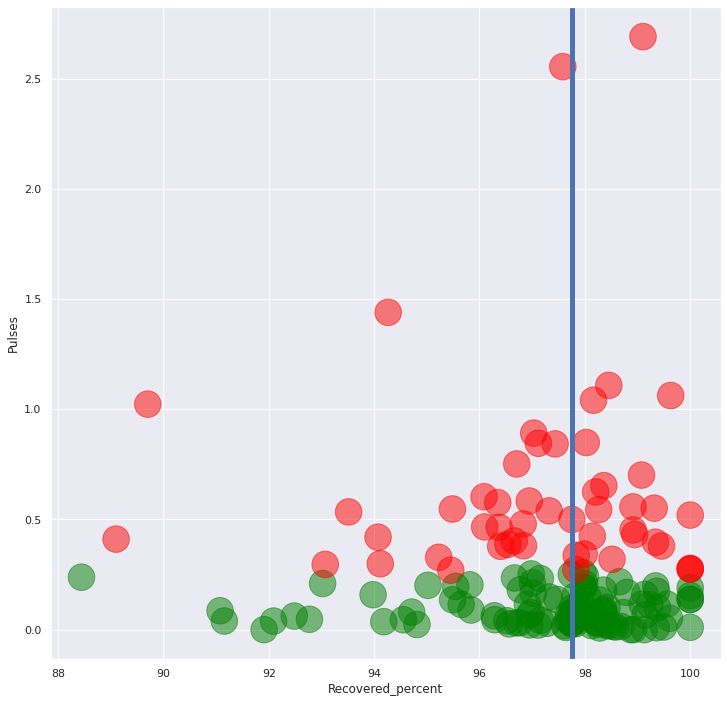

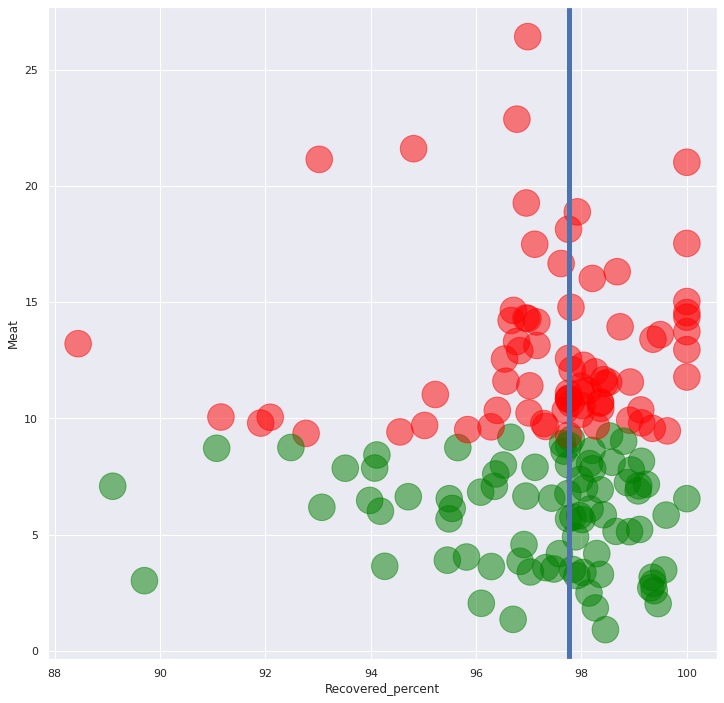

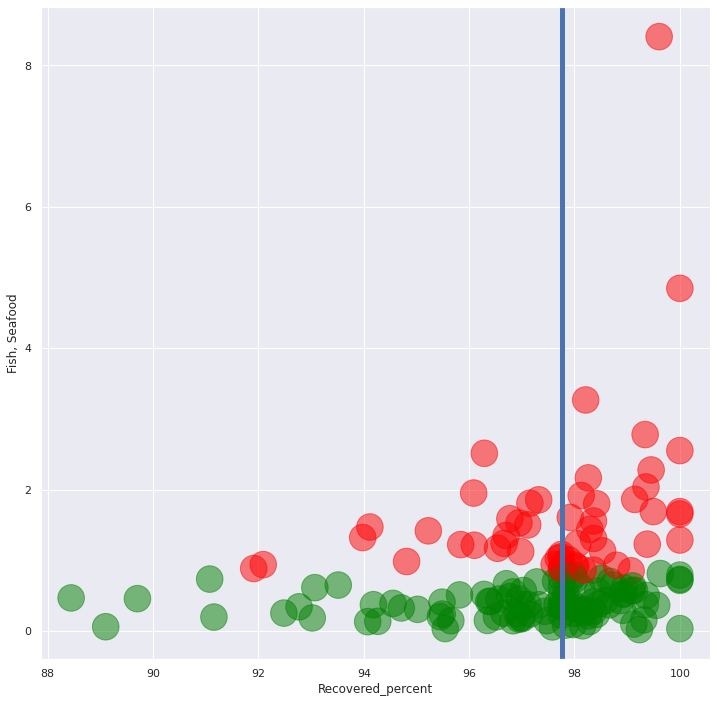

In [114]:
for food in data_food:
    try:
        colors = ["green" if frame.iloc[i][food] < np.mean(frame[food]) else "red"  for i in range(len(frame))]
        area= np.pi * (15 )**2
        a4_dims = (12,12)
        fig, ax = plt.subplots(figsize=a4_dims)
        ax.scatter(y= frame[food], x=frame.Recovered_percent,s=area, c=colors, alpha=0.5)
        ax.set_ylabel(food)
        ax.set_xlabel("Recovered_percent")
        ax.axvline(np.median(frame.Recovered_percent), linewidth=5)
    except: 
        print(food)


Country


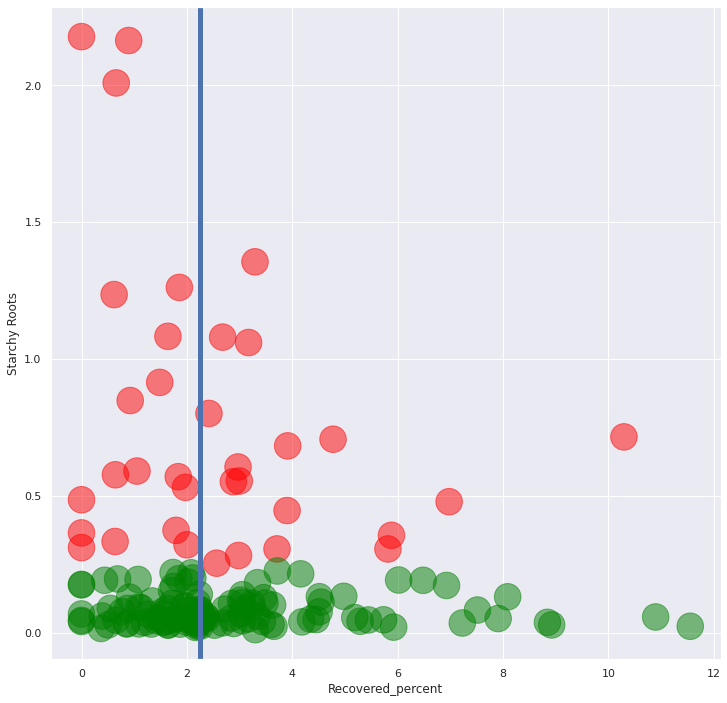

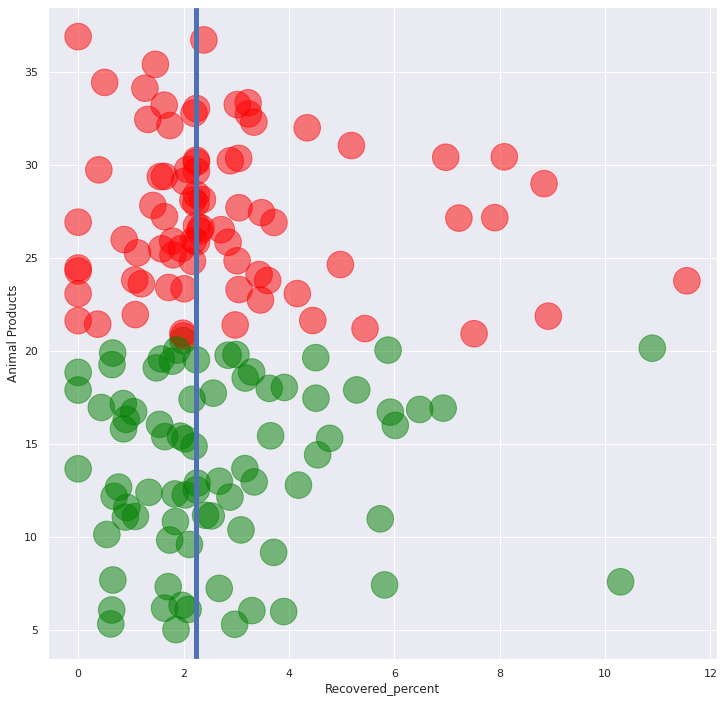

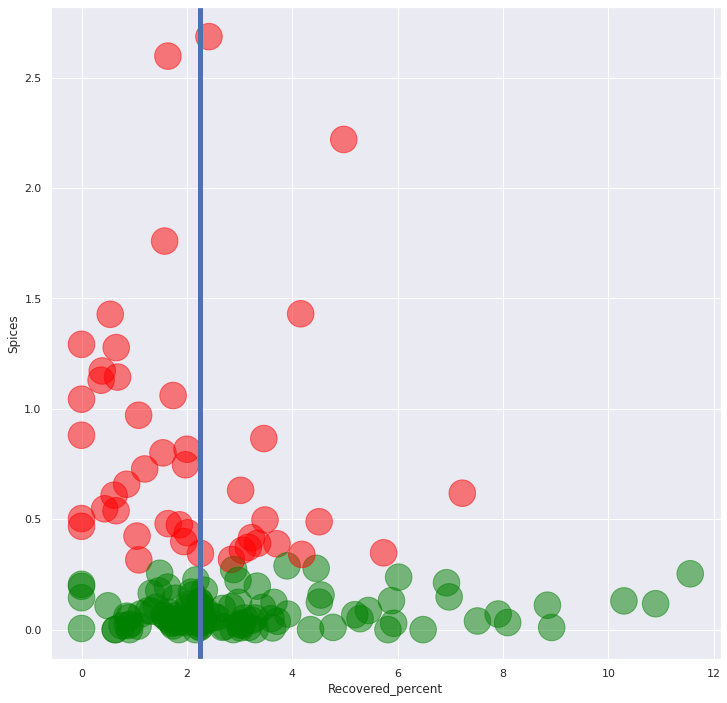

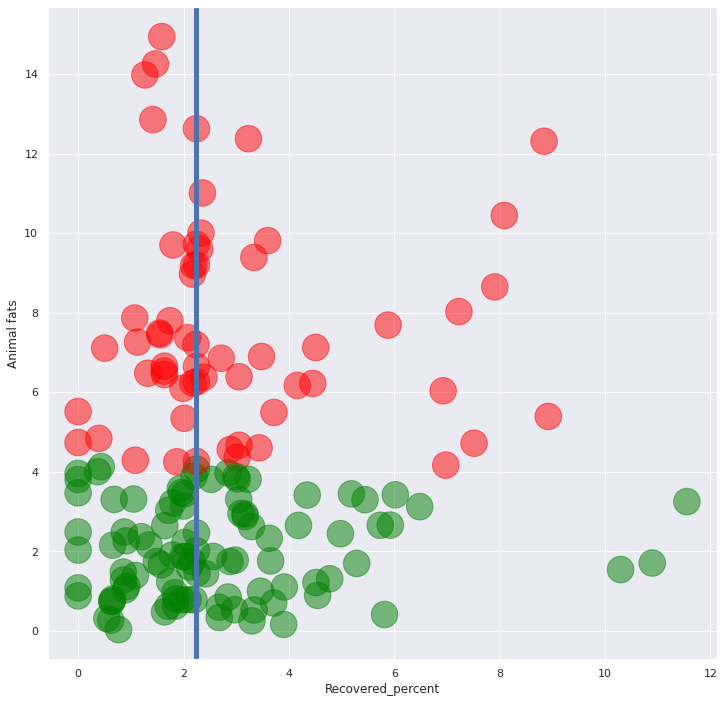

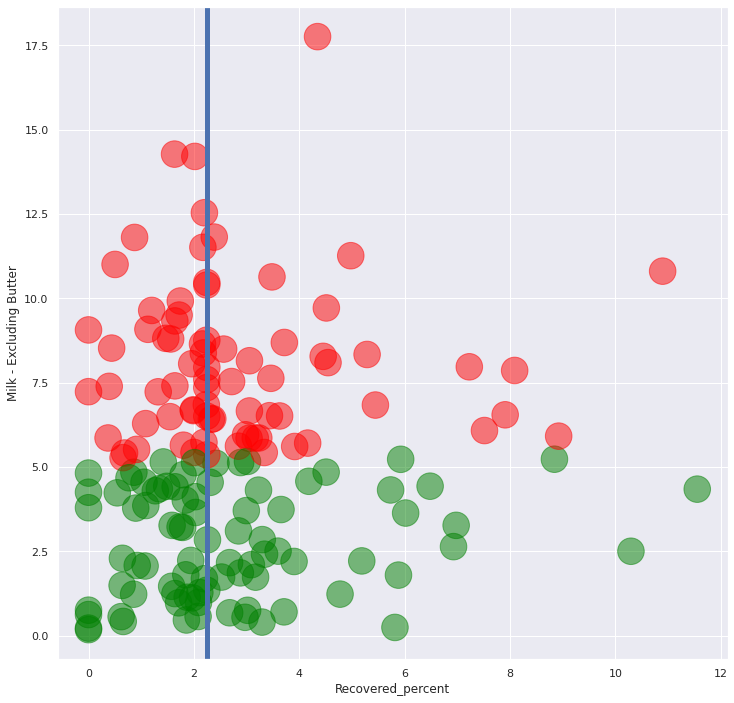

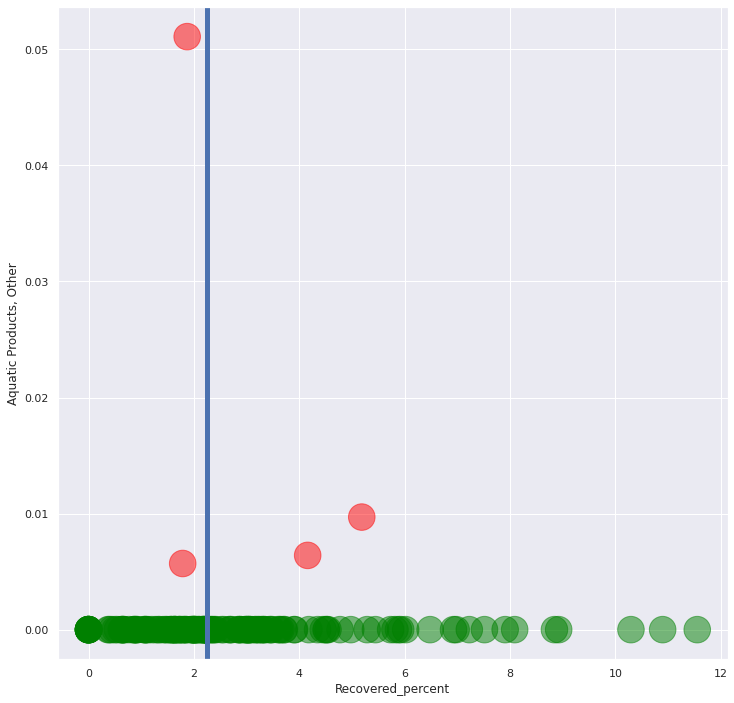

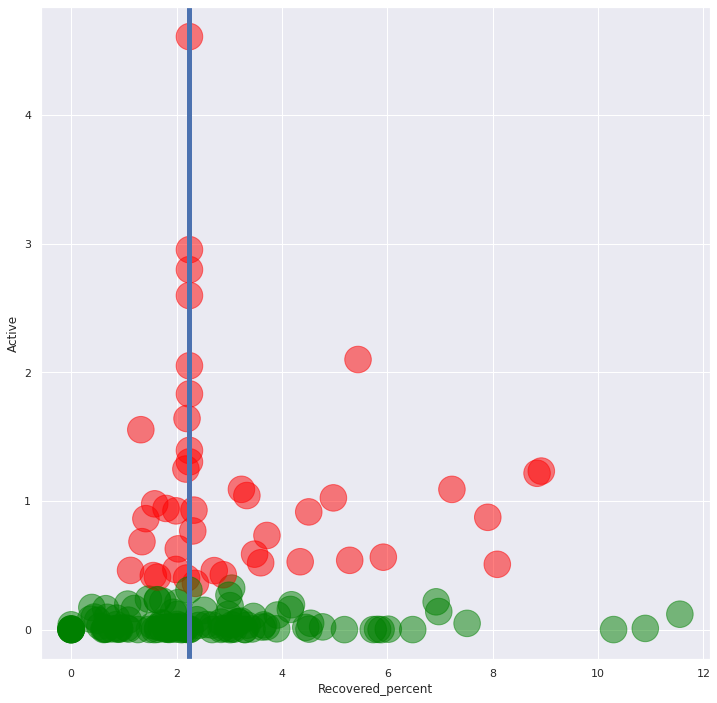

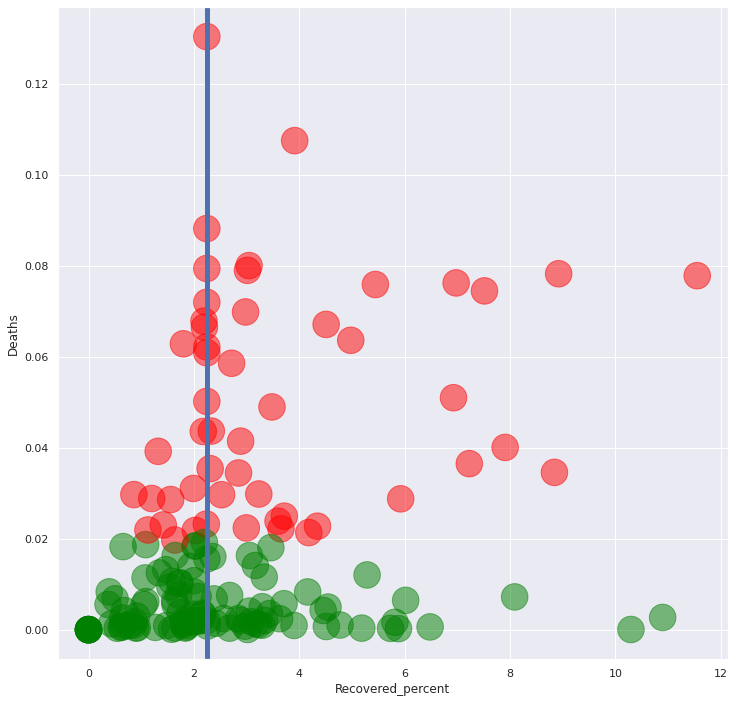

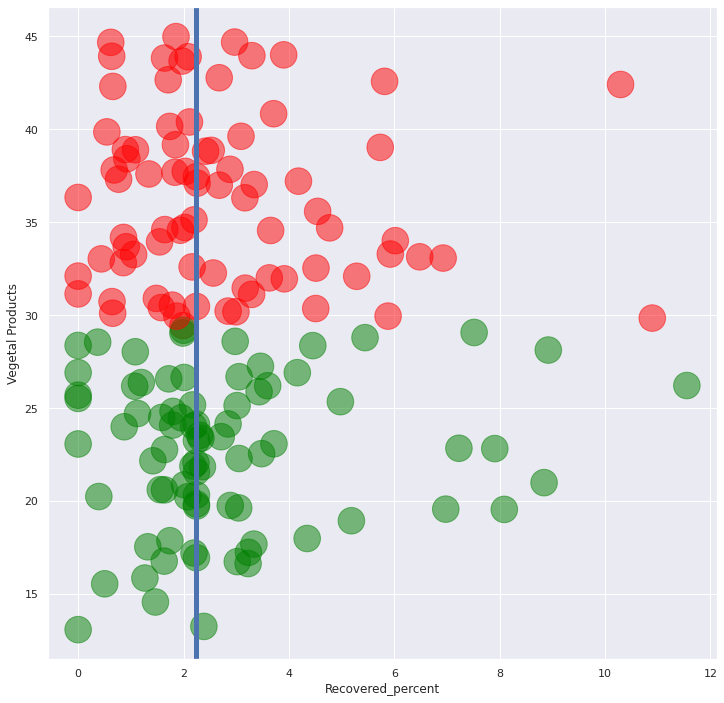

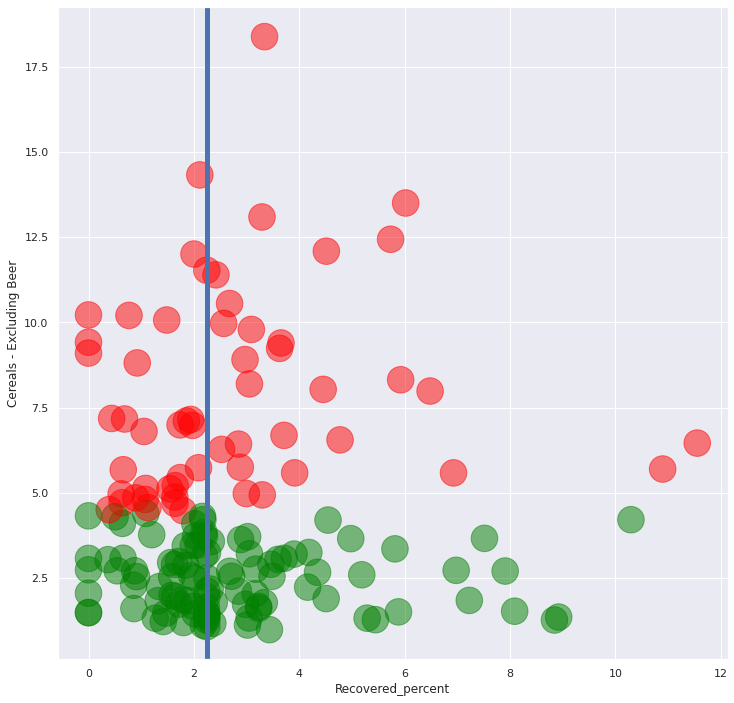

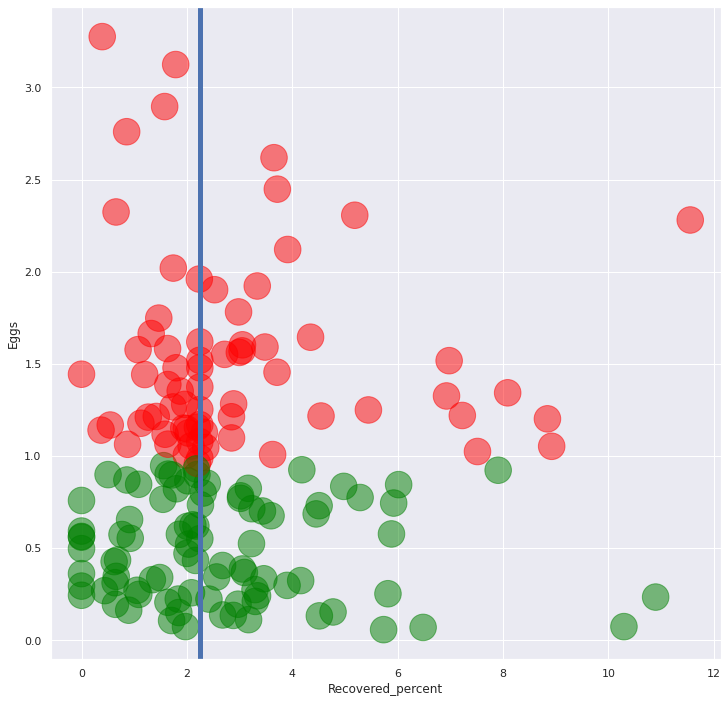

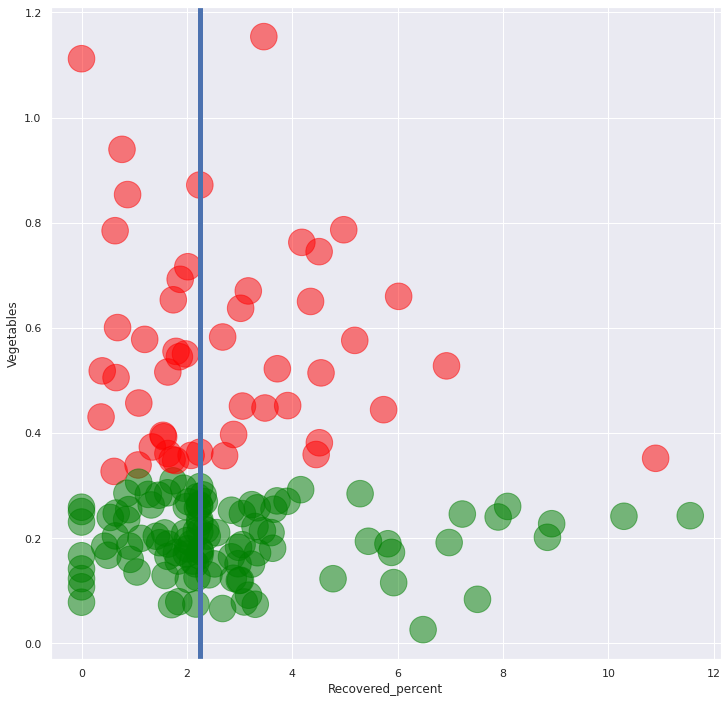

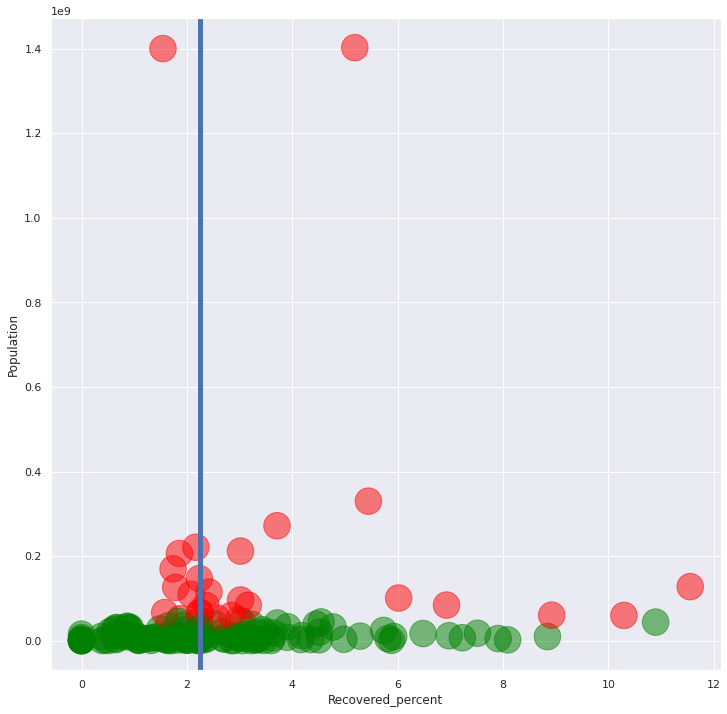

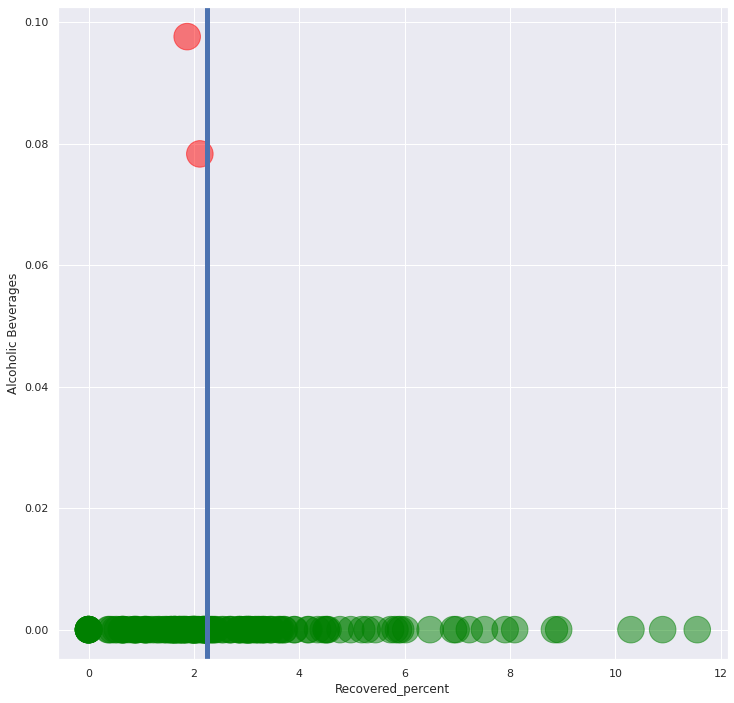

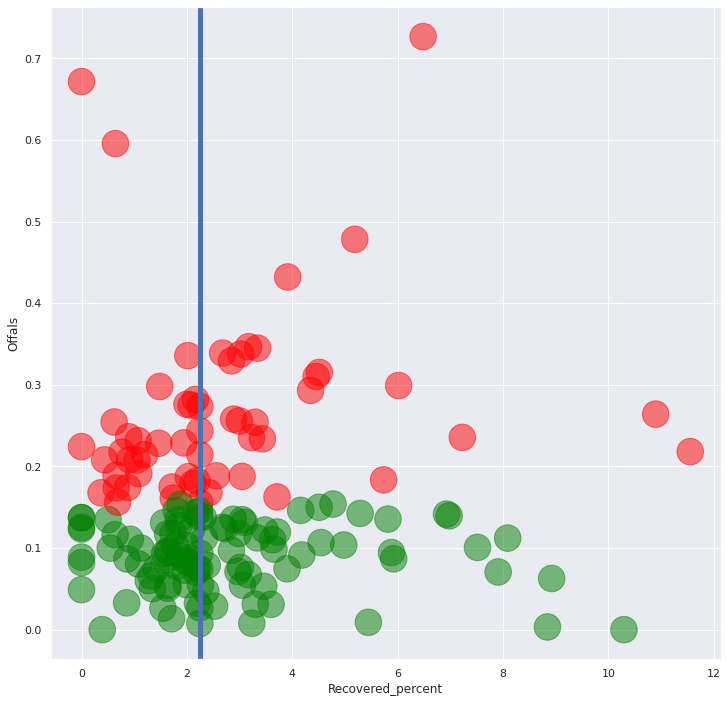

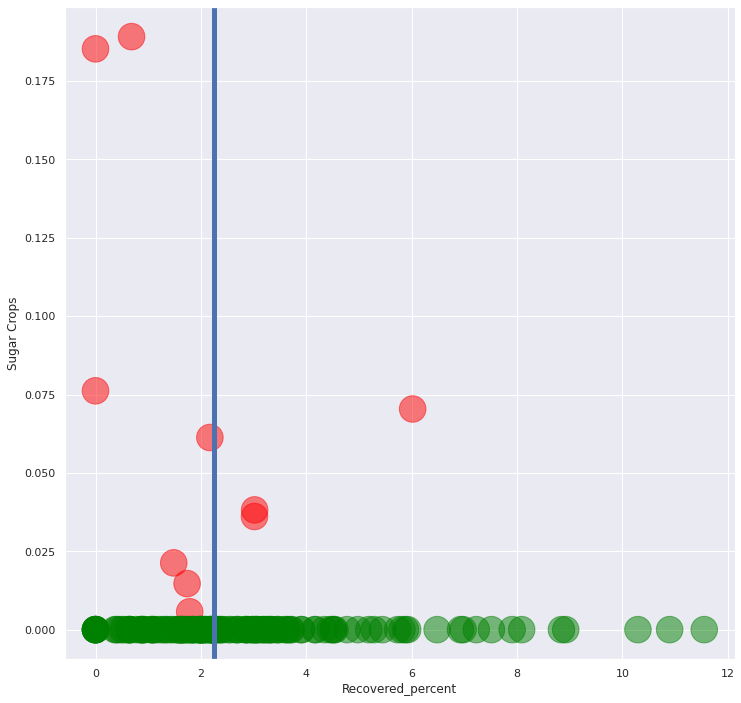

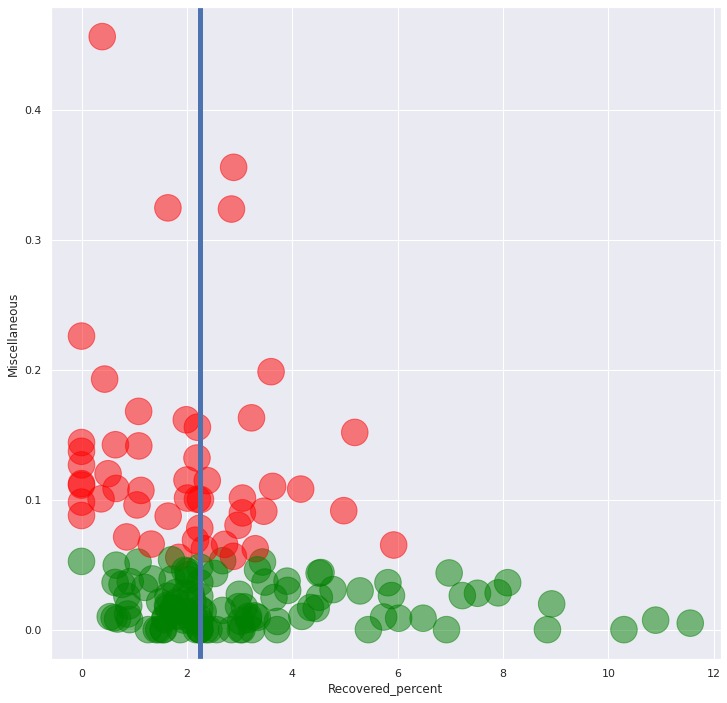

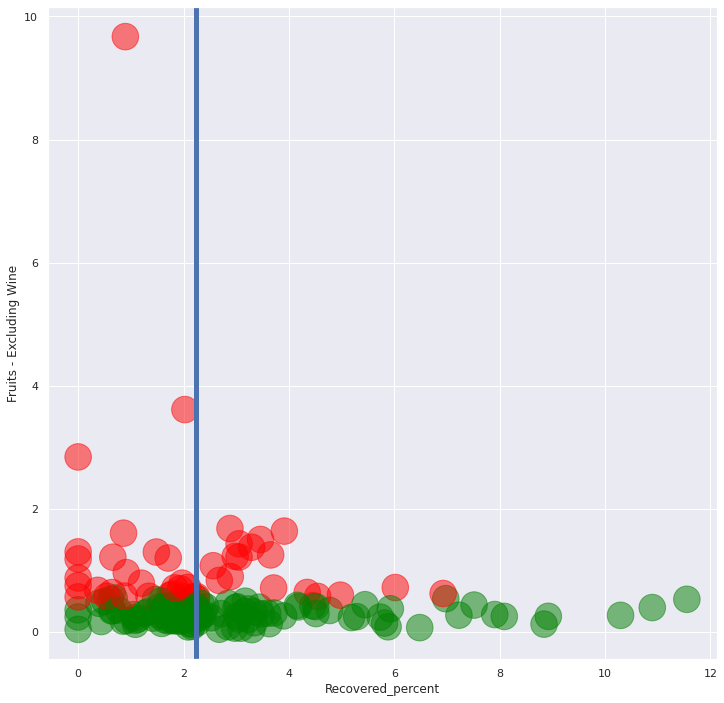

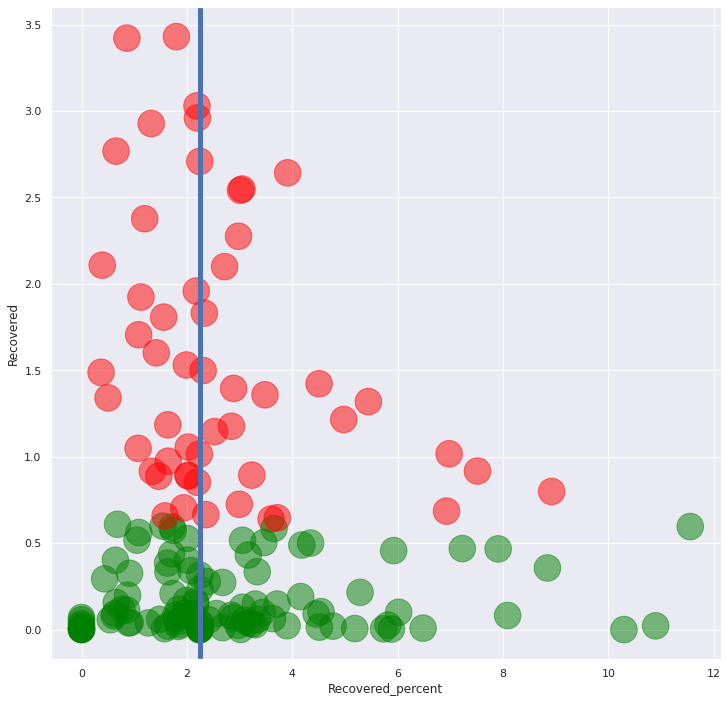

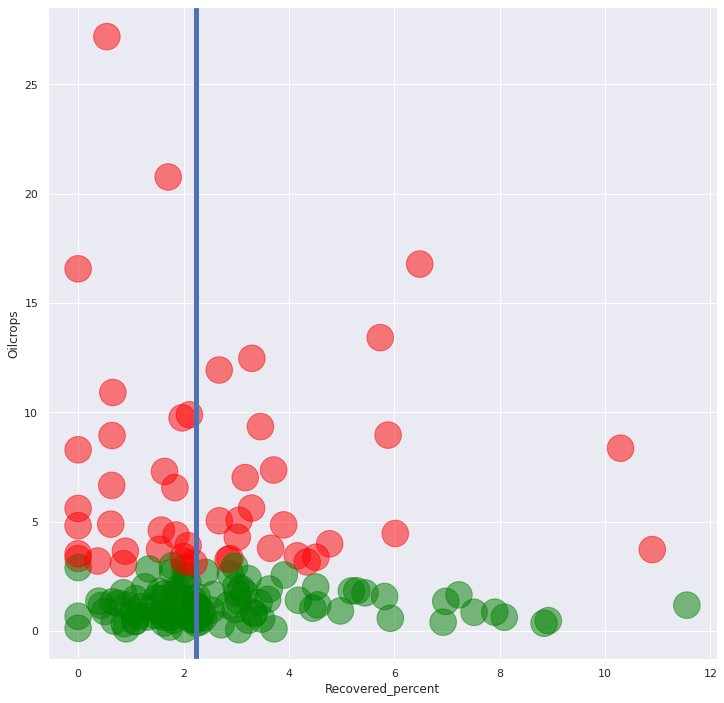

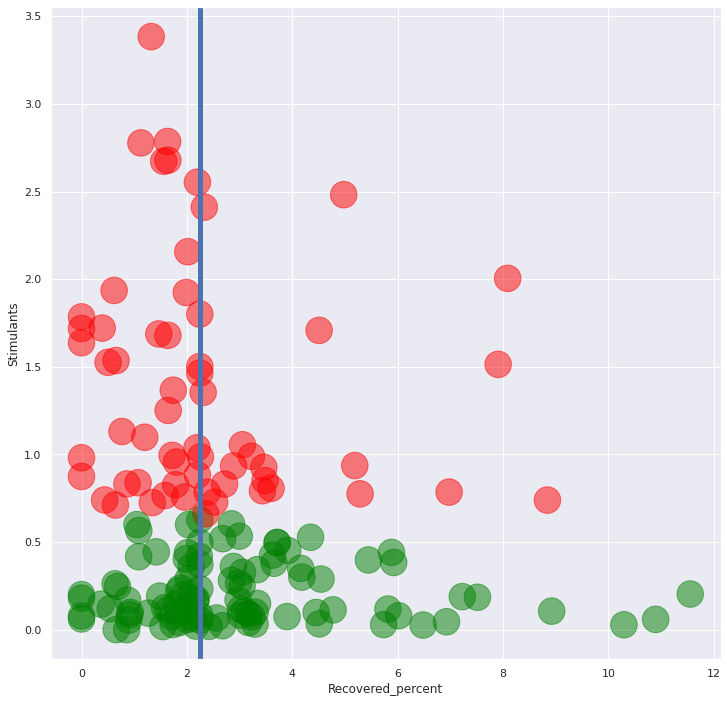

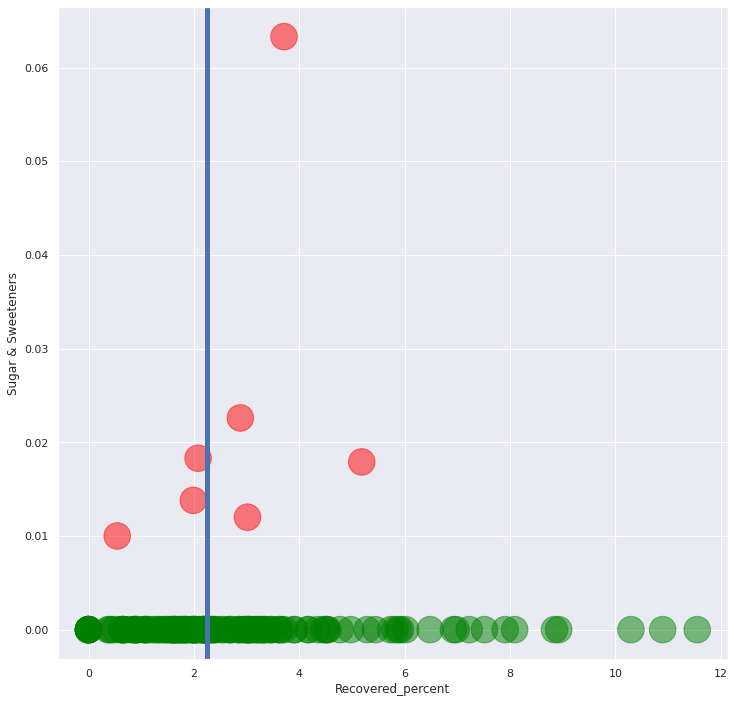

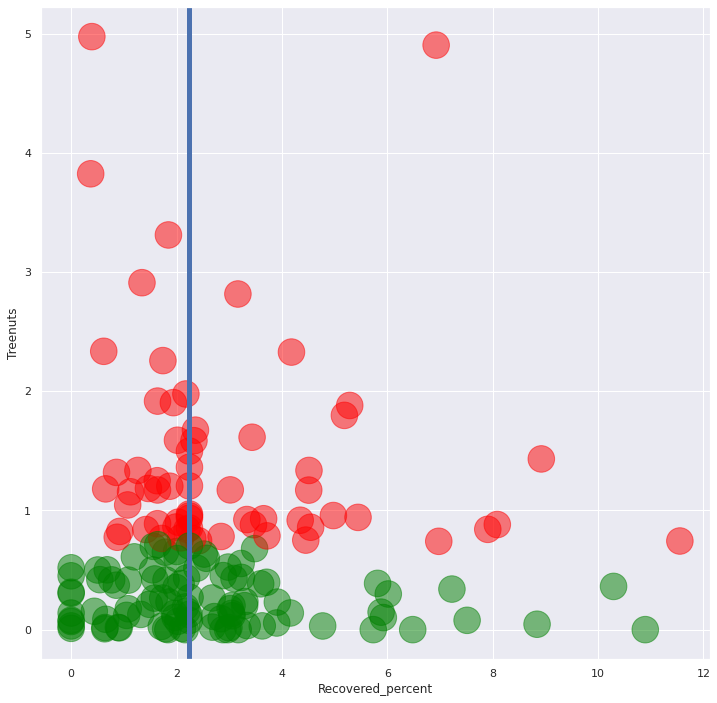

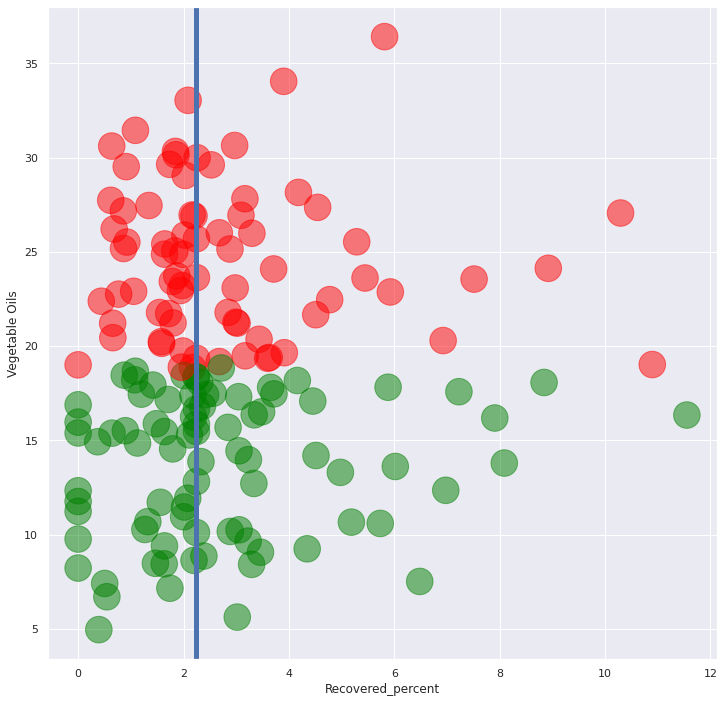

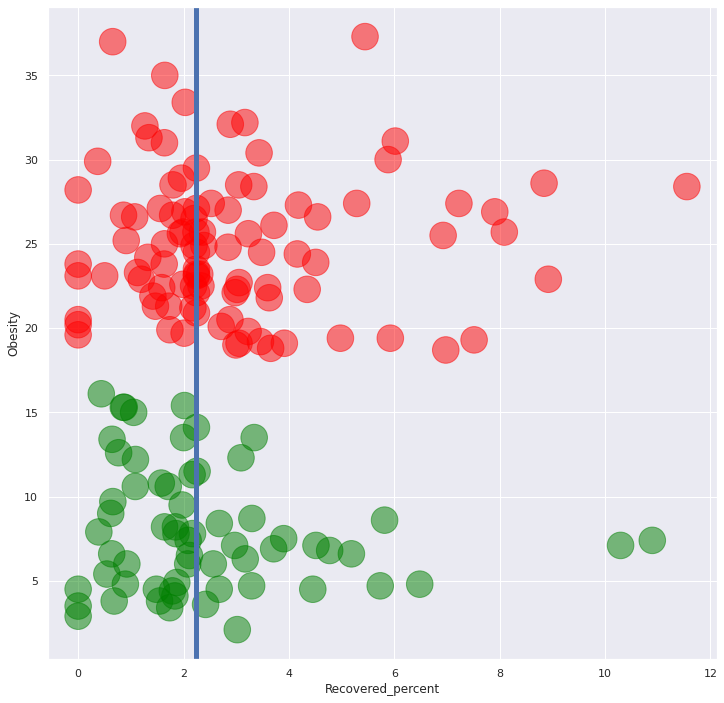

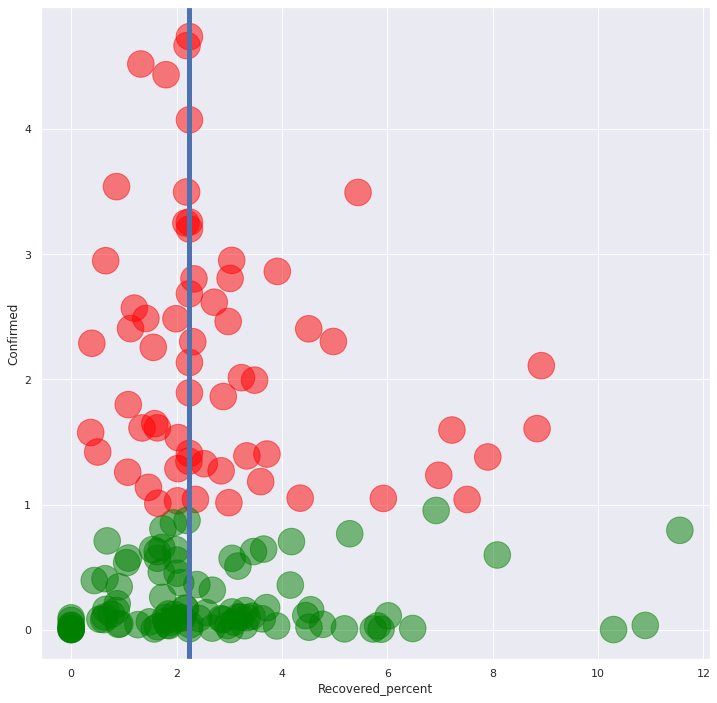

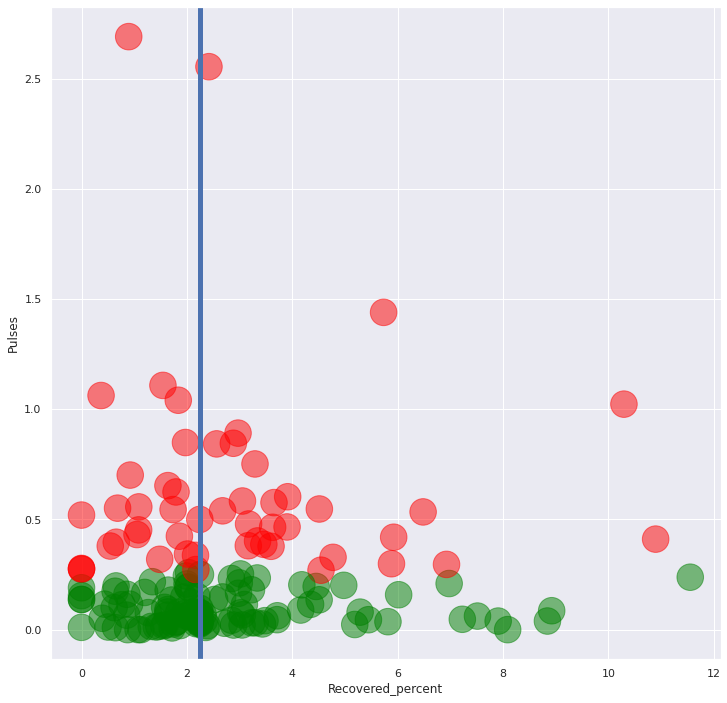

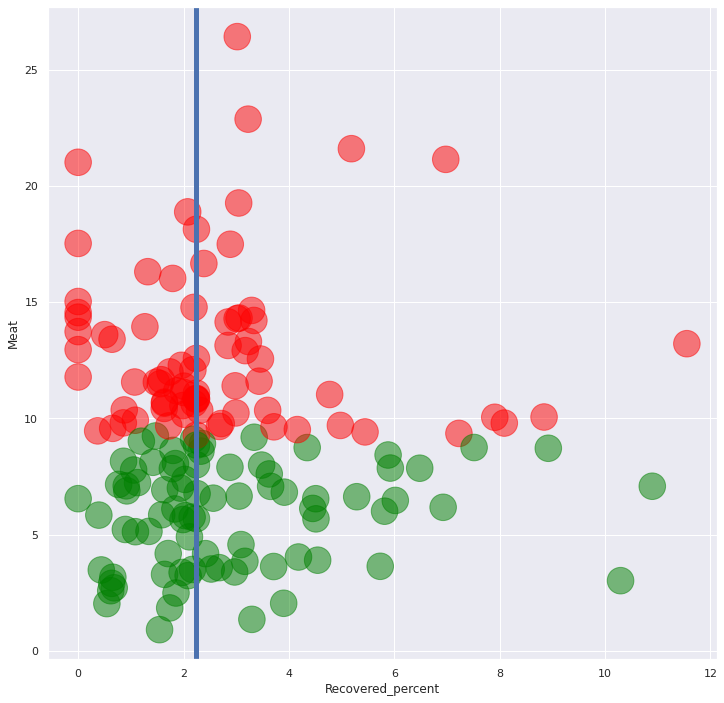

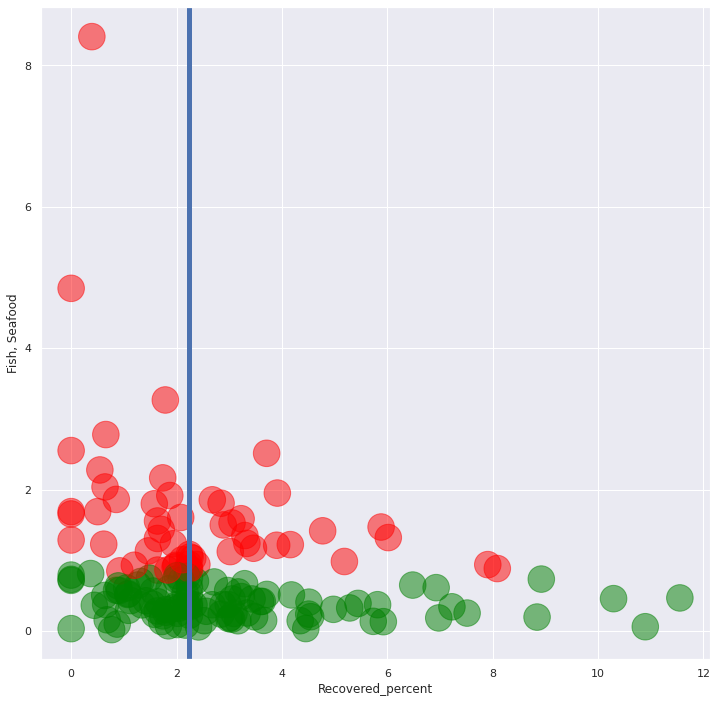

In [115]:
for food in data_food:
    try:
        colors = ["green" if frame.iloc[i][food] < np.mean(frame[food]) else "red"  for i in range(len(frame))]
        area= np.pi * (15 )**2
        a4_dims = (12,12)
        fig, ax = plt.subplots(figsize=a4_dims)
        ax.scatter(y= frame[food], x=frame[name_y],s=area, c=colors, alpha=0.5)
        ax.set_ylabel(food)
        ax.set_xlabel("Recovered_percent")
        ax.axvline(np.median(frame[name_y]), linewidth=5)
    except: 
        print(food)


In [95]:
frame.iloc[26].Obesity

6.3

{'whiskers': [<matplotlib.lines.Line2D at 0x7f71287dd0d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f71287dd850>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f71287dd3a0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f712884d460>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f712884d0a0>,
 'means': []}

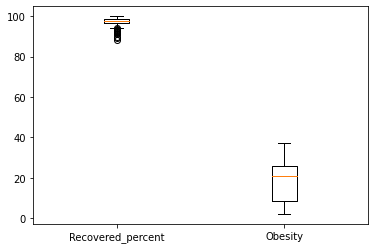

In [86]:
plt.boxplot([frame["Recovered_percent"].values, frame["Obesity"].values], labels=["Recovered_percent", "Obesity"])


In [83]:
np.array(frame["Recovered_percent"].values, frame["Obesity"].values)

TypeError: data type not understood

{'whiskers': [<matplotlib.lines.Line2D at 0x7f71236c2cd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f7123717be0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f71236c2250>],
 'medians': [<matplotlib.lines.Line2D at 0x7f7123717100>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f712375fee0>],
 'means': []}

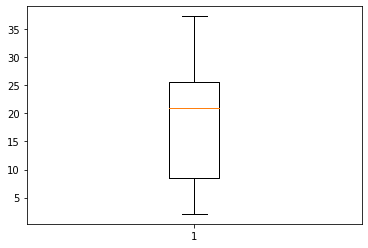

In [73]:
plt.boxplot(frame.Obesity)


/home/brami/env2/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout(*args, **kwargs)


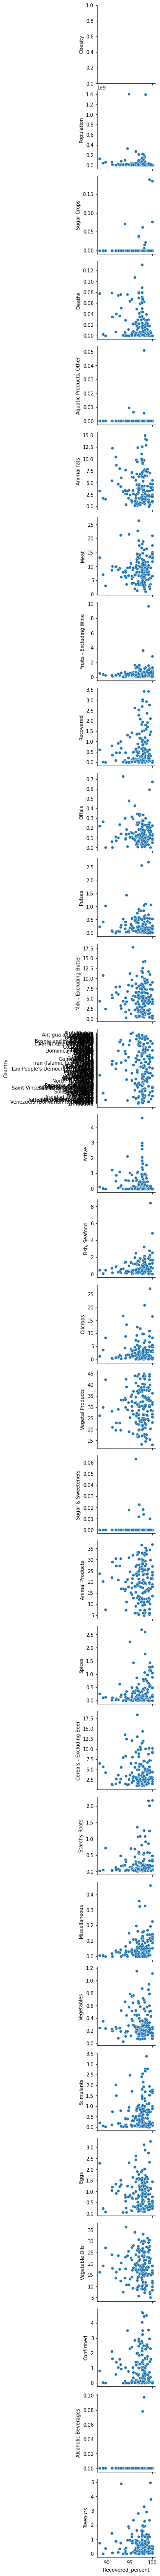

In [48]:
sns.pairplot(
    frame,
    x_vars=data_covid,
    y_vars=data_food,
)


In [116]:
data_covid = ['Confirmed', 'Deaths', 'Recovered', 'Active', 'Population', 'Deaths_percent', 'Recovered_percent', 'Confirmed_finish']

frame_cov = frame[data_covid].sort_values("Confirmed", ascending=True)
frame_food = frame.drop(columns=data_covid + ["Country"])

(array([76., 20., 21., 10.,  8., 10.,  6.,  3.,  1.,  4.]),
 array([3.45208506e-04, 4.74289845e-01, 9.48234482e-01, 1.42217912e+00,
        1.89612376e+00, 2.37006839e+00, 2.84401303e+00, 3.31795767e+00,
        3.79190230e+00, 4.26584694e+00, 4.73979158e+00]),
 <BarContainer object of 10 artists>)

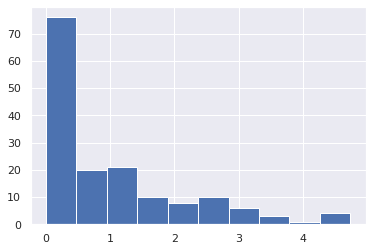

In [117]:
a = plt.hist(frame_cov["Confirmed"])
a

In [118]:
inds = []
prec = 0
grouped_index = []
cpt = 0
fus = []
for i in a[0]:
    if cpt < 3:
        fus += list(frame_cov[int(prec):int(prec+i)].index.values)
    cpt += 1
    #print(i)
    print(frame_cov[int(prec):int(prec+i)].index.values)
    grouped_index.append(frame_cov[int(prec):int(prec+i)].index.values)    
    prec += i
    
grouped_index[0 : 3] = [reduce(lambda i, j: np.array(list(i) + list(j)), grouped_index[0 : 3])] 
#grouped_index[1 : ] = [reduce(lambda i, j: np.array(list(i) + list(j)), grouped_index[1 : ])] 
grouped_index

[ 85 160 166  24 139 150  49 112 149  30 167  28  22 101  96  16 136  89
  93  59 113 151 143 128 156  99 110 127   3 104  82 169  92  36 130  34
  64 142  25 111  12  48 168  41 134  88  76 129  61  27   7  44   0 162
 148  62  79   4  54  94   2  57 117  98  69 163  11  32 165  75  50 121
  19  53 152 132]
[154 106  47  45 115  40  86  46  63  37  68  60  78 153 107  58 100   9
 103 144]
[ 70 133 119  84  43  56  65   1  39  15  17  13 140  42  71 126  72  90
 157 135  67]
[ 77 158  21  66  87  97 137  23  10 145]
[125 122  74 159  35  95 123  18]
[114  55  31  33   8 116 124 108 138  20]
[120  83   5 141 146  51]
[161 118  73]
[6]
[ 38  91 102  14]


[array([ 85, 160, 166,  24, 139, 150,  49, 112, 149,  30, 167,  28,  22,
        101,  96,  16, 136,  89,  93,  59, 113, 151, 143, 128, 156,  99,
        110, 127,   3, 104,  82, 169,  92,  36, 130,  34,  64, 142,  25,
        111,  12,  48, 168,  41, 134,  88,  76, 129,  61,  27,   7,  44,
          0, 162, 148,  62,  79,   4,  54,  94,   2,  57, 117,  98,  69,
        163,  11,  32, 165,  75,  50, 121,  19,  53, 152, 132, 154, 106,
         47,  45, 115,  40,  86,  46,  63,  37,  68,  60,  78, 153, 107,
         58, 100,   9, 103, 144,  70, 133, 119,  84,  43,  56,  65,   1,
         39,  15,  17,  13, 140,  42,  71, 126,  72,  90, 157, 135,  67]),
 array([ 77, 158,  21,  66,  87,  97, 137,  23,  10, 145]),
 array([125, 122,  74, 159,  35,  95, 123,  18]),
 array([114,  55,  31,  33,   8, 116, 124, 108, 138,  20]),
 array([120,  83,   5, 141, 146,  51]),
 array([161, 118,  73]),
 array([6]),
 array([ 38,  91, 102,  14])]

In [126]:
def entity_distance(ent1, ent2):
    cent1 = np.mean(ent1)
    cent2 = np.mean(ent2)
    print(cent1, cent2)
    return np.linalg.norm(cent1-cent2)

In [149]:
distances = np.ones((len(grouped_index), len(grouped_index)), dtype=np.float)

for i in range(len(grouped_index)):
    for j in range(len(grouped_index)):
        if i < j:
            continue
        distances[i, j] = entity_distance(frame_food.loc[grouped_index[i]], frame_food.loc[grouped_index[j]])

for i in range(len(grouped_index)):
    for j in range(len(grouped_index)):
        if i < j:
            distances[i, j] = distances[j, i]
pd.DataFrame(distances)

Alcoholic Beverages          0.001503
Animal fats                  3.385775
Aquatic Products, Other      0.000623
Cereals - Excluding Beer     5.155005
Eggs                         0.853138
Fish, Seafood                0.839537
Fruits - Excluding Wine      0.591726
Meat                         9.045454
Miscellaneous                0.054101
Milk - Excluding Butter      4.682078
Offals                       0.168855
Oilcrops                     3.636817
Pulses                       0.316388
Spices                       0.305966
Starchy Roots                0.286726
Stimulants                   0.523695
Sugar Crops                  0.005661
Sugar & Sweeteners           0.001129
Treenuts                     0.618996
Vegetable Oils              19.220181
Vegetables                   0.306246
Obesity                     16.041880
Deaths_percent               2.790093
dtype: float64 Alcoholic Beverages          0.001503
Animal fats                  3.385775
Aquatic Products, Other      0.0006

0          1         2         3          4          5          6          7
0   0.000000  11.859255  9.808770  8.761116  11.144423  13.555221  11.357281  13.003715
1  11.859255   0.000000  5.924407  4.535299   4.054978   4.704201   9.644604   5.267740
2   9.808770   5.924407  0.000000  4.310458   6.623086   9.788270   4.524589   4.223779
3   8.761116   4.535299  4.310458  0.000000   4.741945   7.155350   7.558205   5.737501
4  11.144423   4.054978  6.623086  4.741945   0.000000   4.620007   9.710015   6.468807
5  13.555221   4.704201  9.788270  7.155350   4.620007   0.000000  13.208394   9.175686
6  11.357281   9.644604  4.524589  7.558205   9.710015  13.208394   0.000000   6.116404
7  13.003715   5.267740  4.223779  5.737501   6.468807   9.175686   6.116404   0.000000

In [166]:
df = pd.DataFrame()
for key, value in dis_intra.items():
    row = pd.Series({ "Mean_dis_intra":value}, name="Cluster "+str(key))
    df = df.append(row)
df

Mean_dis_intra
Cluster 0       14.165517
Cluster 1       10.491513
Cluster 2        9.029233
Cluster 3        5.972510
Cluster 4        8.526268
Cluster 5        8.327010
Cluster 6        0.000000
Cluster 7        8.457700

In [154]:
summ = 0
for i in range(len(distances)):
    for j in range(len(distances)): 
        if i <= j:
            continue
        print(distances[i, j])
        summ += dis_intra[i] + dis_intra[j]/distances[i, j]

11.859254524126646
9.808769563316236
5.924407215854225
8.761116451484877
4.53529902515693
4.310457894592809
11.144422770516949
4.054977640733004
6.623086300016956
4.741945068624801
13.555221089150432
4.704201153655648
9.788269760150495
7.1553499573369646
4.620006970373296
11.357280967718085
9.644604377979162
4.524589235679637
7.55820541424071
9.71001473468919
13.208393618932178
13.003714852251298
5.267739636117317
4.223779266857002
5.737501238683241
6.468807285725063
9.175685846009825
6.116404297979623


In [159]:
for i in dis_intra:
    

{0: 14.165517340827869,
 1: 10.491512648537675,
 2: 9.02923253432795,
 3: 5.972510492315864,
 4: 8.526267698738666,
 5: 8.327009584516071,
 6: 0.0,
 7: 8.457699821435806}

In [ ]:
{0: 14.165517340827869,
 1: 10.491512648537675,
 2: 9.02923253432795,
 3: 5.972510492315864,
 4: 8.526267698738666,
 5: 8.327009584516071,
 6: 0.0,
 7: 8.457699821435806}


In [128]:
distances

array([[ 0.        , 11.85925452,  9.80876956,  8.76111645, 11.14442277,
        13.55522109, 11.35728097, 13.00371485],
       [11.85925452,  0.        ,  5.92440722,  4.53529903,  4.05497764,
         4.70420115,  9.64460438,  5.26773964],
       [ 9.80876956,  5.92440722,  0.        ,  4.31045789,  6.6230863 ,
         9.78826976,  4.52458924,  4.22377927],
       [ 8.76111645,  4.53529903,  4.31045789,  0.        ,  4.74194507,
         7.15534996,  7.55820541,  5.73750124],
       [11.14442277,  4.05497764,  6.6230863 ,  4.74194507,  0.        ,
         4.62000697,  9.71001473,  6.46880729],
       [13.55522109,  4.70420115,  9.78826976,  7.15534996,  4.62000697,
         0.        , 13.20839362,  9.17568585],
       [11.35728097,  9.64460438,  4.52458924,  7.55820541,  9.71001473,
        13.20839362,  0.        ,  6.1164043 ],
       [13.00371485,  5.26773964,  4.22377927,  5.73750124,  6.46880729,
         9.17568585,  6.1164043 ,  0.        ]])

In [ ]:
feature_matrix = df[['feature1','feature2','feature3']].to_numpy()
centroid = df['centroid'].to_numpy()

def nltk_inertia(feature_matrix, centroid):
 sum_ = []
 for i in range(feature_matrix.shape[0]):
     sum_.append(np.sum((feature_matrix[i] - centroid[i])**2))  #here implementing inertia as given in the docs of scikit i.e sum of squared distance..

 return sum(sum_)

nltk_inertia(feature_matrix, centroid)


In [142]:
dis_intra = {}
def entity_distance_intra(ent1, ent2):
    return np.linalg.norm(ent1-ent2)

for cluster in range(len(grouped_index)):
    dis_intra[cluster] = 0
    for i in range(len(grouped_index[cluster])):
        for j in range(len(grouped_index[cluster])):
            if i < j:
                continue
            elem = entity_distance_intra(frame_food.loc[grouped_index[cluster][i]], frame_food.loc[grouped_index[cluster][j]])
            dis_intra[cluster] += elem
dis_intra

{0: 133748.1161139521,
 1: 705.1246076802369,
 2: 389.8046724818606,
 3: 396.06476179067215,
 4: 195.97523468391637,
 5: 43.47595347404918,
 6: 0.0,
 7: 78.42117258837274}

In [147]:
dis_intra = {}
#WCSS
def entity_distance_intra(ent1, ent2):
    cent2 = np.mean(ent2)
    
    return np.linalg.norm(ent1-cent2)

for cluster in range(len(grouped_index)):
    dis_intra[cluster] = 0
    for i in range(len(grouped_index[cluster])):
        elem = entity_distance_intra(frame_food.loc[grouped_index[cluster][i]], frame_food.loc[grouped_index[cluster]])
        dis_intra[cluster] += elem

In [148]:
for cluster in range(len(grouped_index)):
    dis_intra[cluster] = dis_intra[cluster]/len(frame_food.loc[grouped_index[cluster]])
dis_intra

{0: 14.165517340827869,
 1: 10.491512648537675,
 2: 9.02923253432795,
 3: 5.972510492315864,
 4: 8.526267698738666,
 5: 8.327009584516071,
 6: 0.0,
 7: 8.457699821435806}

Confirmed Animal Products


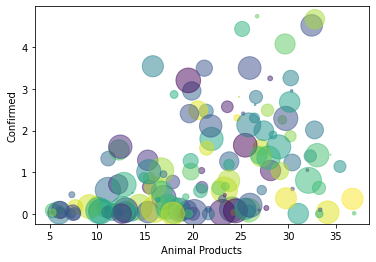

Confirmed Spices


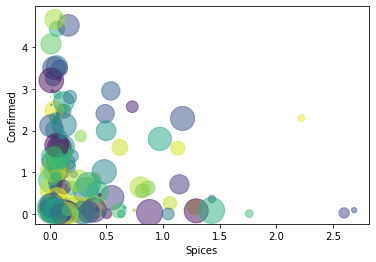

Confirmed Aquatic Products, Other


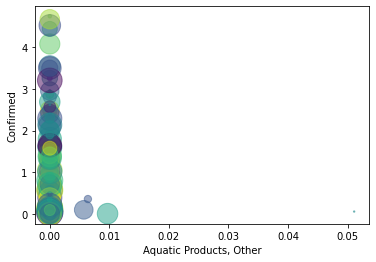

Confirmed Cereals - Excluding Beer


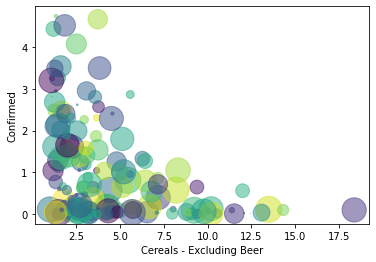

Confirmed Eggs


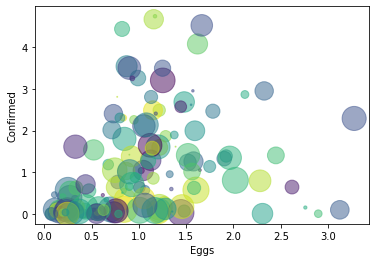

Confirmed Vegetables


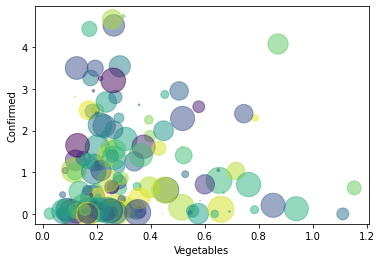

Confirmed Oilcrops


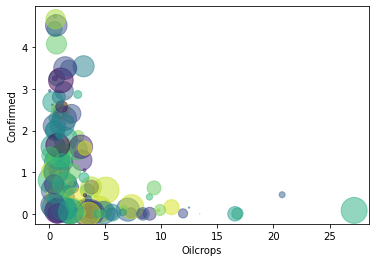

Confirmed Stimulants


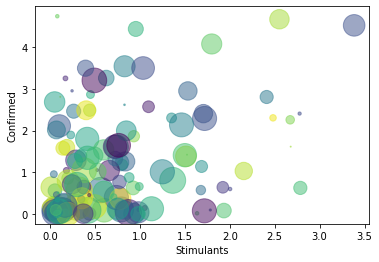

Confirmed Sugar & Sweeteners


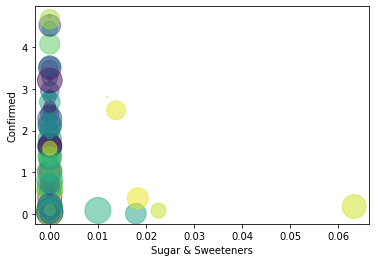

Confirmed Country


KeyboardInterrupt: 

In [14]:
data_covid = ['Confirmed', 'Deaths', 'Recovered', 'Active', 'Population']
data_covid = ['Confirmed', 'Deaths', 'Recovered', 'Active', 'Confirmed_finish', 'Deaths_percent', 'Recovered_percent',]
data_food =  set(frame.columns) - set(data_covid)

colors=np.random.rand(len(frame))
area= np.pi * (15 * np.random.rand(len(frame)))**2

for malade in data_covid:
    for food in data_food:
        print(malade, food)
        fig, ax = plt.subplots() 
        ax.scatter(y= frame[malade], x=frame[food], s=area, c=colors, alpha=0.5)
        ax.set_ylabel(malade)
        ax.set_xlabel(food)
        plt.show()


In [15]:
colors

array([0.51595996, 0.55611145, 0.16449257, 0.0898119 , 0.08849611,
       0.12876398, 0.34522825, 0.24380007, 0.87311521, 0.44260206,
       0.39623497, 0.05892693, 0.81473711, 0.34971225, 0.70595791,
       0.77255297, 0.09141818, 0.39704542, 0.34320581, 0.36300107,
       0.7079795 , 0.16625743, 0.6486778 , 0.86225697, 0.56801093,
       0.05911636, 0.33982519, 0.28709636, 0.2076216 , 0.48047492,
       0.66121061, 0.4881179 , 0.10658551, 0.51517347, 0.71028477,
       0.86270201, 0.31527887, 0.93526757, 0.48044471, 0.72980247,
       0.06734955, 0.00359128, 0.6939693 , 0.08937027, 0.26409511,
       0.88185637, 0.33412621, 0.90878263, 0.68070409, 0.286739  ,
       0.12623475, 0.32826374, 0.92371911, 0.39596144, 0.23843626,
       0.13538722, 0.36913437, 0.24624298, 0.04589908, 0.80814536,
       0.42519504, 0.17009525, 0.66395214, 0.33607399, 0.57725591,
       0.12491624, 0.65174726, 0.87917546, 0.37197518, 0.1103637 ,
       0.31970612, 0.4553886 , 0.74766006, 0.28487633, 0.32279

In [160]:
data_food

{'Alcoholic Beverages',
 'Animal Products',
 'Animal fats',
 'Aquatic Products, Other',
 'Cereals - Excluding Beer',
 'Country',
 'Eggs',
 'Fish, Seafood',
 'Fruits - Excluding Wine',
 'Meat',
 'Milk - Excluding Butter',
 'Miscellaneous',
 'Obesity',
 'Offals',
 'Oilcrops',
 'Population',
 'Pulses',
 'Spices',
 'Starchy Roots',
 'Stimulants',
 'Sugar & Sweeteners',
 'Sugar Crops',
 'Treenuts',
 'Vegetable Oils',
 'Vegetables',
 'Vegetal Products'}

In [121]:
data_covid = ['Confirmed', 'Deaths', 'Recovered', 'Active']
data_covid = ['Confirmed', 'Deaths', 'Recovered', 'Active', 'Confirmed_finish', 'Deaths_percent', 'Recovered_percent',]

matrix = frame.drop(columns=(['Population','Country'])).corr()[data_covid]

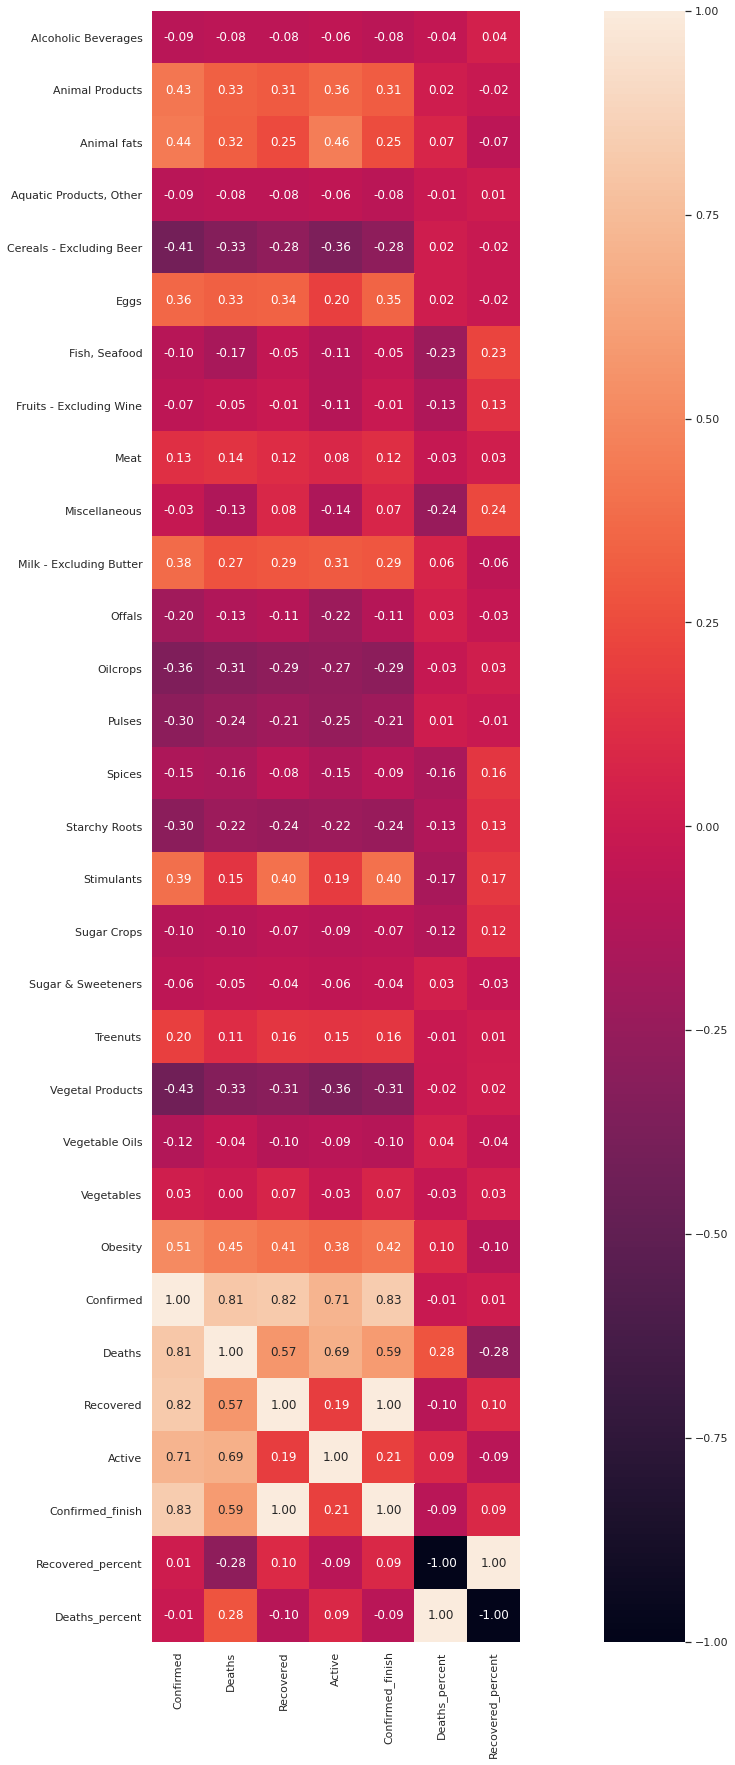

In [122]:
#Affichage
#plot correlation seaborn
from matplotlib import pyplot
import seaborn

a4_dims = (30, 30)
fig, ax = pyplot.subplots(figsize=a4_dims)

sns.set(font_scale=1.0)
heatmap = sns.heatmap(matrix, ax=ax, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=frame.drop(columns=(['Population','Country'])).corr().columns, xticklabels=matrix.columns)



0.40053764933827873
[ 85 160 166  24 139 150  49 112 149  30 167  28  22 101  96  16 136  89
  93  59 113 151 143 128 156  99 110 127   3 104  82 169  92  36 130  34
  64 142  25 111  12  48 168  41 134  88  76 129  61  27   7  44   0 162
 148  62  79   4  54  94   2  57 117  98  69 163  11  32 165  75  50 121
  19  53 152 132 154 106  47  45 115  40  86  46  63  37  68  60  78 153
 107  58 100   9 103 144  70 133 119  84  43  56  65   1  39  15  17  13
 140  42  71 126  72  90 157 135  67]


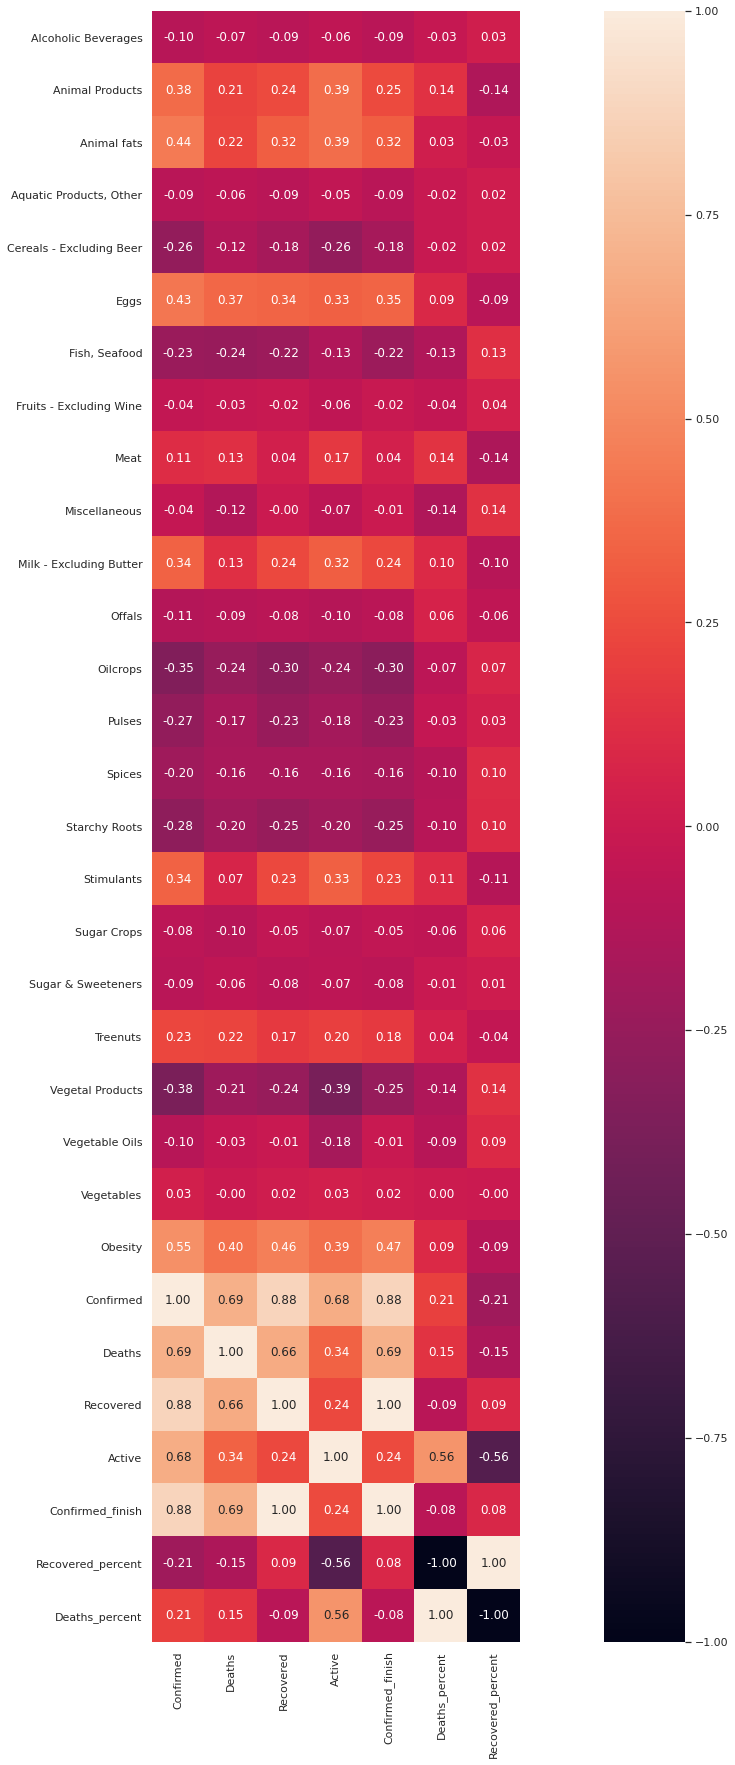

1.674014310529677
[ 77 158  21  66  87  97 137  23  10 145]


KeyboardInterrupt: 

In [21]:
for ind in grouped_index:
    big_mat = frame.loc[ind].drop(columns=(['Population','Country'])).corr()
    print(np.mean(frame.loc[ind]["Confirmed"]))
    print(ind)
    matrix = big_mat[data_covid]
    a4_dims = (30, 30)
    fig, ax = pyplot.subplots(figsize=a4_dims)
    sns.set(font_scale=1.0)
    heatmap = sns.heatmap(matrix, ax=ax, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=big_mat.columns, xticklabels=matrix.columns)
    plt.show()

In [17]:
frame_food = frame.drop(columns=["Country", "Active", "Deaths", "Confirmed", "Population",
                                 "Vegetal Products", "Animal Products", "Obesity", "Spices", 
                                 "Confirmed_finish", "Recovered", "Deaths_percent"])


In [18]:
frame_food

Alcoholic Beverages  Animal fats  Aquatic Products, Other  Cereals - Excluding Beer    Eggs  Fish, Seafood  Fruits - Excluding Wine     Meat  Miscellaneous  Milk - Excluding Butter  Offals  Oilcrops  Pulses  Starchy Roots  Stimulants  Sugar Crops  Sugar & Sweeteners  Treenuts  Vegetable Oils  Vegetables  Recovered_percent
0                 0.0000       6.2224                   0.0000                    8.0353  0.6859         0.0327                   0.4246   6.1244         0.0163                   8.2803  0.3103    1.0452  0.1960         0.0490      0.0980       0.0000              0.0000    0.7513         17.0831      0.3593          95.546833
1                 0.0000       3.4172                   0.0000                    2.6734  1.6448         0.1445                   0.6418   8.7428         0.0170                  17.7576  0.2933    3.1622  0.1148         0.0510      0.5270       0.0000              0.0000    0.9181          9.2443      0.6503          95.653344
2                 0.0000       0.8972                   0.0000                    4.2035  1.2171         0.2008                   0.5772   3.8961         0.0439                   8.0934  0.1067    1.1983  0.2698         0.1129      0.2886       0.0000              0.0000    0.8595         27.3606      0.5145          95.454545
3                 0.0000       1.3130                   0.0000                    6.5545  0.1539         1.4155                   0.3488  11.0268         0.0308                   1.2309  0.1539    3.9902  0.3282         0.7078      0.1128       0.0000              0.0000    0.0308         22.4638      0.1231          95.226456
4                 0.0000       4.6686                   0.0000                    3.2153  0.3872         1.5263                   1.2177  14.3202         0.0898                   6.6607  0.1347    1.3579  0.0673         0.0449      1.0549       0.0000              0.0000    0.2020         14.4436      0.2469          96.946565
5                 0.0000       3.3076                   0.0000                    1.3316  1.5706         0.1664                   0.2091  19.2693         0.0000                   5.8512  0.1878    0.0640  0.0213         0.1110      0.2475       0.0000              0.0000    0.1366         17.3147      0.1878          96.952854
6                 0.0000       6.2619                   0.0000                    2.5068  1.6196         0.2218                   0.5468  10.8165         0.0361                  10.4709  0.2734    0.6602  0.0774         0.0567      1.8002       0.0000              0.0000    0.9542         12.8127      0.8717          97.754798
7                 0.0000       4.6030                   0.0000                    0.9908  0.7017         0.4515                   0.4028  11.6002         0.0520                   6.5196  0.2339    1.2929  0.0260         0.0422      0.7926       0.0000              0.0000    1.6145         20.3612      0.2144          96.566215
8                 0.0000      12.8517                   0.0000                    1.2297  1.2147         0.4259                   0.2249   8.1099         0.0000                   5.1497  0.0750    1.1367  0.0120         0.0450      0.4439       0.0000              0.0000    0.8398         17.9323      0.2039          98.581413
9                 0.0000       7.7987                   0.0000                    5.4481  2.0197         0.2122                   0.5940  11.9993         0.0170                   9.9202  0.1612    0.1867  0.0255         0.1697      1.3663       0.0000              0.0000    2.2573          7.1538      0.6534          98.258399
10                0.0000       4.5600                   0.0000                    3.6327  1.2829         1.4991                   0.8995  17.4941         0.3556                   5.1318  0.2580    2.6077  0.0209         0.0349      0.9343       0.0000              0.0000    0.4532         10.1659      0.3974          97.113000
11                0.0000       1.2369                   0

for i in frame_food.columns:
    print(i)
    frame_food[i].hist()
    plt.show()

In [19]:
#supprimer valeur abberante:
from scipy import stats
z_scores = stats.zscore(frame_food)
#calculate z-scores of `df`

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
frame_food = frame_food[filtered_entries]

for i in new_df.columns:
    print(i)
    new_df[i].hist()
    plt.show()

In [20]:
frame_food

Alcoholic Beverages  Animal fats  Aquatic Products, Other  Cereals - Excluding Beer    Eggs  Fish, Seafood  Fruits - Excluding Wine     Meat  Miscellaneous  Milk - Excluding Butter  Offals  Oilcrops  Pulses  Starchy Roots  Stimulants  Sugar Crops  Sugar & Sweeteners  Treenuts  Vegetable Oils  Vegetables  Recovered_percent
0                    0.0       6.2224                   0.0000                    8.0353  0.6859         0.0327                   0.4246   6.1244         0.0163                   8.2803  0.3103    1.0452  0.1960         0.0490      0.0980       0.0000              0.0000    0.7513         17.0831      0.3593          95.546833
2                    0.0       0.8972                   0.0000                    4.2035  1.2171         0.2008                   0.5772   3.8961         0.0439                   8.0934  0.1067    1.1983  0.2698         0.1129      0.2886       0.0000              0.0000    0.8595         27.3606      0.5145          95.454545
3                    0.0       1.3130                   0.0000                    6.5545  0.1539         1.4155                   0.3488  11.0268         0.0308                   1.2309  0.1539    3.9902  0.3282         0.7078      0.1128       0.0000              0.0000    0.0308         22.4638      0.1231          95.226456
4                    0.0       4.6686                   0.0000                    3.2153  0.3872         1.5263                   1.2177  14.3202         0.0898                   6.6607  0.1347    1.3579  0.0673         0.0449      1.0549       0.0000              0.0000    0.2020         14.4436      0.2469          96.946565
5                    0.0       3.3076                   0.0000                    1.3316  1.5706         0.1664                   0.2091  19.2693         0.0000                   5.8512  0.1878    0.0640  0.0213         0.1110      0.2475       0.0000              0.0000    0.1366         17.3147      0.1878          96.952854
6                    0.0       6.2619                   0.0000                    2.5068  1.6196         0.2218                   0.5468  10.8165         0.0361                  10.4709  0.2734    0.6602  0.0774         0.0567      1.8002       0.0000              0.0000    0.9542         12.8127      0.8717          97.754798
7                    0.0       4.6030                   0.0000                    0.9908  0.7017         0.4515                   0.4028  11.6002         0.0520                   6.5196  0.2339    1.2929  0.0260         0.0422      0.7926       0.0000              0.0000    1.6145         20.3612      0.2144          96.566215
8                    0.0      12.8517                   0.0000                    1.2297  1.2147         0.4259                   0.2249   8.1099         0.0000                   5.1497  0.0750    1.1367  0.0120         0.0450      0.4439       0.0000              0.0000    0.8398         17.9323      0.2039          98.581413
9                    0.0       7.7987                   0.0000                    5.4481  2.0197         0.2122                   0.5940  11.9993         0.0170                   9.9202  0.1612    0.1867  0.0255         0.1697      1.3663       0.0000              0.0000    2.2573          7.1538      0.6534          98.258399
11                   0.0       1.2369                   0.0000                    6.9946  1.2664         2.1646                   0.4270   1.8407         0.0147                   3.2249  0.1178    0.6332  0.5448         0.2209      0.0295       0.0147              0.0000    0.2651         29.6422      0.3092          98.262076
13                   0.0       7.8662                   0.0000                    4.8075  1.5772         0.5151                   0.2316  11.5636         0.0519                   2.0644  0.2316    0.4392  0.0000         0.1957      0.8385       0.0000              0.0000    1.0462         18.2119      0.3394          98.926397
15                   0.0       9.8102                   0

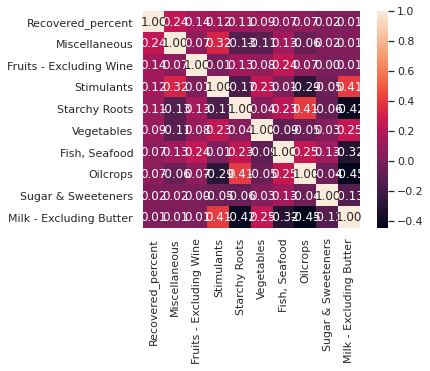

In [21]:
correlation = frame_food.corr(method='pearson')
columns = correlation.nlargest(10, name_y).index

correlation_map = np.corrcoef(frame_food[columns].values.T)
sns.set(font_scale=1.0)
heatmap = sns.heatmap(correlation_map, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=columns.values, xticklabels=columns.values)

plt.show()


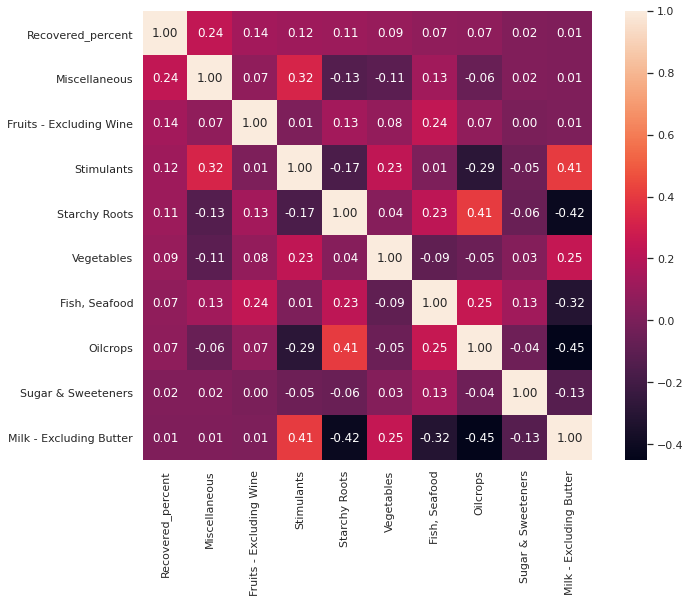

In [22]:

from matplotlib import pyplot
import seaborn

a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)

correlation_map = np.corrcoef(frame_food[columns].values.T)
sns.set(font_scale=1.0)
heatmap = sns.heatmap(correlation_map, ax=ax, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=columns.values, xticklabels=columns.values)


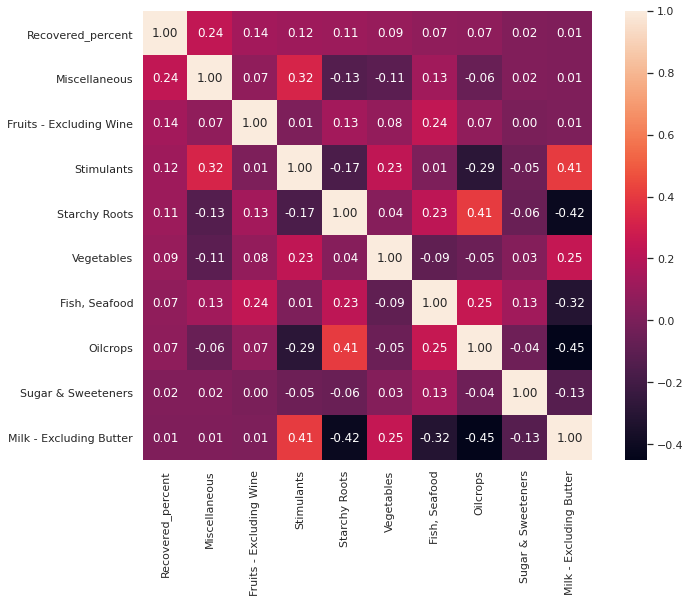

In [23]:
from matplotlib import pyplot
import seaborn

a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)

correlation_map = np.corrcoef(frame_food[columns].values.T)
sns.set(font_scale=1.0)
heatmap = sns.heatmap(correlation_map, ax=ax, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=columns.values, xticklabels=columns.values)


In [24]:
frame_food[columns[0:7]]

Recovered_percent  Miscellaneous  Fruits - Excluding Wine  Stimulants  Starchy Roots  Vegetables  Fish, Seafood
0            95.546833         0.0163                   0.4246      0.0980         0.0490      0.3593         0.0327
2            95.454545         0.0439                   0.5772      0.2886         0.1129      0.5145         0.2008
3            95.226456         0.0308                   0.3488      0.1128         0.7078      0.1231         1.4155
4            96.946565         0.0898                   1.2177      1.0549         0.0449      0.2469         1.5263
5            96.952854         0.0000                   0.2091      0.2475         0.1110      0.1878         0.1664
6            97.754798         0.0361                   0.5468      1.8002         0.0567      0.8717         0.2218
7            96.566215         0.0520                   0.4028      0.7926         0.0422      0.2144         0.4515
8            98.581413         0.0000                   0.2249      0.4439         0.0450      0.2039         0.4259
9            98.258399         0.0170                   0.5940      1.3663         0.1697      0.6534         0.2122
11           98.262076         0.0147                   0.4270      0.0295         0.2209      0.3092         2.1646
13           98.926397         0.0519                   0.2316      0.8385         0.1957      0.3394         0.5151
15           96.402878         0.1984                   0.3039      0.8062         0.0310      0.2108         0.4155
16           98.360031         0.0258                   0.1978      0.1118         1.0835      0.3612         0.8599
17           93.023238         0.0436                   0.5407      0.7849         0.4796      0.1919         0.1831
18           95.023228         0.0915                   0.5976      2.4819         0.1342      0.7866         0.3049
19           99.560826         0.1927                   0.1696      0.7399         0.1927      0.1850         0.3622
20           96.983249         0.0000                   0.2528      0.1164         0.1204      0.1204         0.1886
21           92.773493         0.0262                   0.2723      0.1885         0.0367      0.2461         0.3404
22           97.322835         0.0148                   0.0443      0.0222         0.0369      0.0665         0.3692
23           98.915311         0.1679                   0.1898      0.4161         0.0949      0.3066         0.5256
25           98.026706         0.0280                   0.7931      0.1213         0.5319      0.5505         0.9051
27           96.829391         0.0102                   0.4998      0.0408         1.0609      0.0918         0.5509
30           94.814199         0.1517                   0.2344      0.9362         0.0565      0.5763         0.9817
31           97.019781         0.0177                   1.2273      0.2655         0.2832      0.1829         0.3717
32           97.321198         0.0530                   0.8370      0.5191         1.0806      0.5827         1.8540
33           98.010673         0.0138                   0.5700      0.4045         0.0506      0.1701         0.9286
34           99.381028         0.0091                   0.5271      1.9357         1.2359      0.3272         1.2268
35           98.440886         0.0000                   0.2577      2.6726         0.0393      0.3930         0.5633
36           98.206217         0.0139                   0.6179      0.1458         0.3749      0.5554         0.2638
37           98.011639         0.1614                   0.3632      1.9236         0.0404      0.2601         0.7309
38           98.199373         0.0212                   0.1870      0.9563         0.0565      0.1729         0.3000
40           98.912656         0.1413                   0.1247      0.5653         0.0333      0.4572         0.2910
41          100.000000         0.1123                   1.1856      1.7846         0.4867      0.2309         1.6536
43           92.485506     

# Meilleur regression avec groupby

In [25]:
set(frame.columns) - set(["Country", "Active", "Deaths", "Confirmed", "Population",
                                 "Vegetal Products", "Animal Products", "Obesity",
                                 "Confirmed_finish", "Recovered", "Deaths_percent"])

{'Alcoholic Beverages',
 'Animal fats',
 'Aquatic Products, Other',
 'Cereals - Excluding Beer',
 'Eggs',
 'Fish, Seafood',
 'Fruits - Excluding Wine',
 'Meat',
 'Milk - Excluding Butter',
 'Miscellaneous',
 'Offals',
 'Oilcrops',
 'Pulses',
 'Recovered_percent',
 'Spices',
 'Starchy Roots',
 'Stimulants',
 'Sugar & Sweeteners',
 'Sugar Crops',
 'Treenuts',
 'Vegetable Oils',
 'Vegetables'}

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
import warnings
warnings.filterwarnings("ignore")
cpt = 0
for ind in grouped_index:
    cpt += 1
    big_mat = frame.loc[ind].drop(columns=(['Population','Country'])).corr()
    print(ind)
    print(np.mean(frame.loc[ind]["Confirmed"]))
    print(len(frame.loc[ind]["Confirmed"]))
    
    current_frame = frame.loc[ind]
    frame_food = current_frame.drop(columns=["Country", "Active", "Deaths", "Confirmed", "Population",
                                 "Vegetal Products", "Animal Products", "Obesity",
                                 "Confirmed_finish", "Recovered", "Deaths_percent"])

    a4_dims = (11.7, 8.27)
    fig, ax = pyplot.subplots(figsize=a4_dims)
    correlation = frame_food.corr(method='pearson')
    columns = correlation.nlargest(10, name_y).index

    correlation_map = np.corrcoef(frame_food[columns].values.T)
    sns.set(font_scale=1.0)
    heatmap = sns.heatmap(correlation_map, ax=ax, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=columns.values, xticklabels=columns.values)
    print(correlation_map[0])
    plt.show(ax)

    
    
    X = frame_food[columns[0:]]
    Y = X[name_y].values

    a = 0
    b = 100
    print(columns)
    d = Y
    min_d = np.min(d)
    max_d = np.max(d)
    normalized_d = (b - a) * ((d - min_d) / (max_d - min_d)) + a

    def denormalized(x):
        return (x / (b - a)) * (max_d - min_d) + min_d 



    X = X.drop(name_y, axis = 1).values

    Y = normalized_d
    ind = Y != 0 

    X = X[ind,]
    Y = Y[ind]


    a = 0
    b = 100
    print(columns)
    d = Y
    min_d = np.min(d)
    max_d = np.max(d)
    normalized_d = (b - a) * ((d - min_d) / (max_d - min_d)) + a

    Y = normalized_d




    pipelines = []
    pipelines.append(('ScaledLR', Pipeline([('LR',LinearRegression())])))
    pipelines.append(('ScaledLASSO', Pipeline([('LASSO', Lasso())])))
    pipelines.append(('ScaledLASSO', Pipeline([('LASSO', Ridge())])))
    pipelines.append(('ScaledEN', Pipeline([('EN', ElasticNet())])))
    pipelines.append(('ScaledKNN', Pipeline([('KNN', KNeighborsRegressor())])))
    pipelines.append(('ScaledCART', Pipeline([('CART', DecisionTreeRegressor())])))
    pipelines.append(('ScaledGBM', Pipeline([('GBM', GradientBoostingRegressor())])))
    pipelines.append(('ScaledGBM', Pipeline([('RandomForestRegressor', RandomForestRegressor())])))


    results = []
    names = []
    for name, model in pipelines:
        kfold = KFold(n_splits=10, random_state=21)
        kfold = LeaveOneOut()
        try:
            cv_results = cross_val_score(model, X, Y, cv=kfold, scoring='neg_mean_squared_error')
        except Exception as e:
            try :
                print("excemt",e, len(X))
                kfold = KFold(n_splits=int(len(X)/2), random_state=21)
                cv_results = cross_val_score(model, X, Y, cv=kfold, scoring='neg_mean_squared_error')
            except Exception as e2:
                print("excemt",e2, len(X))
                model.fit(X_train, Y_train)
                class tmp(): 
                    content = {}
                cv_results = tmp()
                cv_results.mean = lambda : mean_squared_error(model.predict(X_train), Y_train)
                cv_results.std = lambda : -1

            
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        pred = []
        for ind in range(len(X)):
            dataX = np.delete(X, ind, axis=0)
            dataY = np.delete(Y, ind, axis=0)
            try:
                model.fit(dataX, dataY)
                pred.append(model.predict(X[ind].reshape(1, -1))[0])
            except:
                pred = [-1 for i in Y]
        for ind in range(len(pred)):
            print("pred = ", pred[ind], "Y = ", Y[ind])
            print("denormalized pred = ", denormalized(pred[ind]), "denormalized Y = ", denormalized(Y[ind]))
            print()

        g=plt.scatter(pred, Y)
        #g=plt.scatter(denormalized(Y_train), denormalized(model.predict(X_train)))

        g.axes.set_yscale('log')
        g.axes.set_xscale('log')
        g.axes.set_xlabel('True Values ')
        g.axes.set_ylabel('Predictions ')
        g.axes.axis('equal')
        g.axes.axis('square')
        plt.show(g)
            
        g=plt.scatter(Y, Y)
        #g=plt.scatter(denormalized(Y_train), denormalized(model.predict(X_train)))

        g.axes.set_yscale('log')
        g.axes.set_xscale('log')
        g.axes.set_xlabel('True Values ')
        g.axes.set_ylabel('Predictions ')
        g.axes.axis('equal')
        g.axes.axis('square')
        plt.show(g)
        





In [242]:
# en gardant les valeur au dessus 1

[ 77 158  21  66  87  97 137  23  10 145 125 122  74 159  35  95 123  18
 114  55  31  33   8 116 124 108 138  20 120  83   5 141 146  51 161 118
  73   6  38  91 102  14]
2.650496093329261
42
[1.         0.29745324 0.22354281 0.19527568 0.17612217 0.17419371
 0.16669149 0.1297309  0.1194049  0.11737401]


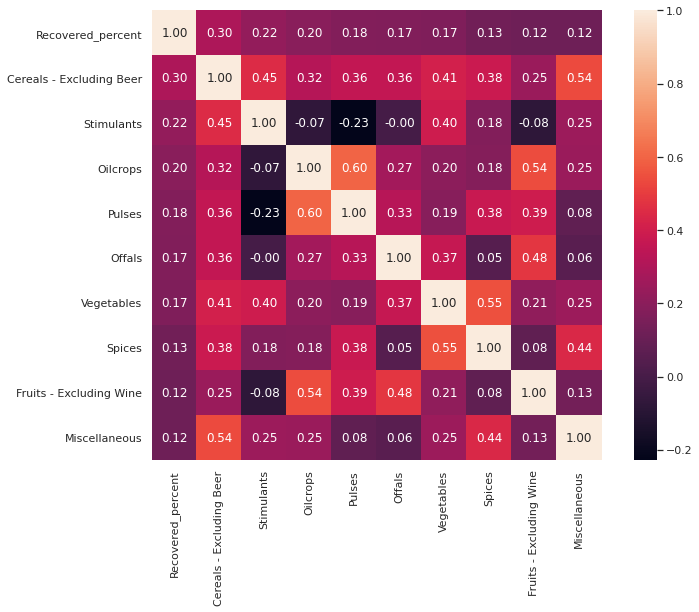

Index(['Recovered_percent', 'Cereals - Excluding Beer', 'Stimulants', 'Oilcrops', 'Pulses', 'Offals', 'Vegetables', 'Spices', 'Fruits - Excluding Wine', 'Miscellaneous'], dtype='object')
Index(['Recovered_percent', 'Cereals - Excluding Beer', 'Stimulants', 'Oilcrops', 'Pulses', 'Offals', 'Vegetables', 'Spices', 'Fruits - Excluding Wine', 'Miscellaneous'], dtype='object')
ScaledLR: -415.352715 (1471.271791)
pred =  103.84597874400353 Y =  98.23152668592834
denormalized pred =  103.62721876133082 denormalized Y =  98.33211777529581

pred =  84.76194515921576 Y =  100.0
denormalized pred =  85.62868853842272 denormalized Y =  100.0

pred =  92.8054728189415 Y =  92.70399663961032
denormalized pred =  93.2146988563762 denormalized Y =  93.11899466090398

pred =  85.86106843573796 Y =  90.98453378680796
denormalized pred =  86.66529347957919 denormalized Y =  91.4973351733625

pred =  94.37488146360668 Y =  98.96421960830335
denormalized pred =  94.69483924690749 denormalized Y =  99.023134

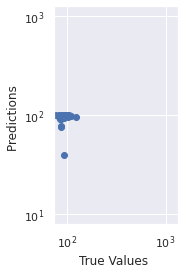

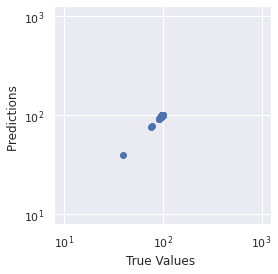

ScaledLASSO: -332.070146 (1412.873471)
pred =  96.77529418638484 Y =  98.23152668592834
denormalized pred =  96.95871604980803 denormalized Y =  98.33211777529581

pred =  94.13474673284051 Y =  100.0
denormalized pred =  94.46836342406519 denormalized Y =  100.0

pred =  90.11180619900816 Y =  92.70399663961032
denormalized pred =  90.6742484922585 denormalized Y =  93.11899466090398

pred =  87.81901784260825 Y =  90.98453378680796
denormalized pred =  88.5118743618603 denormalized Y =  91.4973351733625

pred =  91.35110049011189 Y =  98.96421960830335
denormalized pred =  91.84305149474787 denormalized Y =  99.02313498865837

pred =  100.94604717785484 Y =  98.6512968872773
denormalized pred =  100.89223583930865 denormalized Y =  98.72801136991188

pred =  90.3184412748562 Y =  98.70677700380509
denormalized pred =  90.86913012675365 denormalized Y =  98.78033576714478

pred =  101.91801617533494 Y =  99.24048373409184
denormalized pred =  101.80891906034532 denormalized Y =  99.28

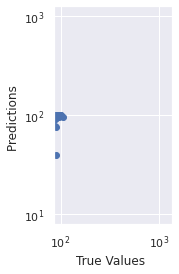

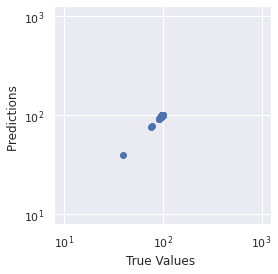

ScaledLASSO: -360.992285 (1438.341520)
pred =  100.87676474893578 Y =  98.23152668592834
denormalized pred =  100.82689420776748 denormalized Y =  98.33211777529581

pred =  95.95921114114716 Y =  100.0
denormalized pred =  96.18905195920291 denormalized Y =  100.0

pred =  90.88108361975257 Y =  92.70399663961032
denormalized pred =  91.3997692709531 denormalized Y =  93.11899466090398

pred =  86.28192016053899 Y =  90.98453378680796
denormalized pred =  87.06220708039322 denormalized Y =  91.4973351733625

pred =  93.50961101926228 Y =  98.96421960830335
denormalized pred =  93.87878554555917 denormalized Y =  99.02313498865837

pred =  103.8898449172976 Y =  98.6512968872773
denormalized pred =  103.66858981857033 denormalized Y =  98.72801136991188

pred =  89.44803963886092 Y =  98.70677700380509
denormalized pred =  90.04823709688509 denormalized Y =  98.78033576714478

pred =  105.06166277557662 Y =  99.24048373409184
denormalized pred =  104.77375446022083 denormalized Y =  99

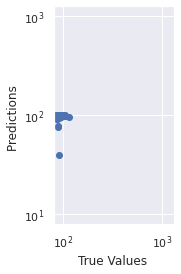

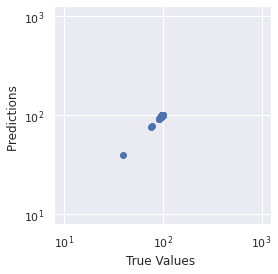

ScaledEN: -330.368738 (1419.558192)
pred =  96.69922910084773 Y =  98.23152668592834
denormalized pred =  96.88697756041242 denormalized Y =  98.33211777529581

pred =  94.7593987937894 Y =  100.0
denormalized pred =  95.05748516019295 denormalized Y =  100.0

pred =  90.83215283380319 Y =  92.70399663961032
denormalized pred =  91.35362167716335 denormalized Y =  93.11899466090398

pred =  88.22964650238838 Y =  90.98453378680796
denormalized pred =  88.89914638748365 denormalized Y =  91.4973351733625

pred =  92.27766641064645 Y =  98.96421960830335
denormalized pred =  92.71691417425768 denormalized Y =  99.02313498865837

pred =  99.36348842583578 Y =  98.6512968872773
denormalized pred =  99.39969332196327 denormalized Y =  98.72801136991188

pred =  90.44576260265808 Y =  98.70677700380509
denormalized pred =  90.98920939386883 denormalized Y =  98.78033576714478

pred =  100.08851233779933 Y =  99.24048373409184
denormalized pred =  100.08347773964576 denormalized Y =  99.28368

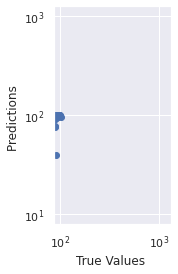

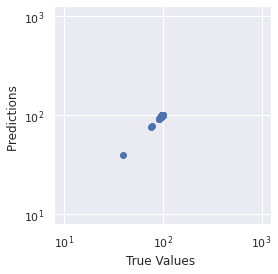

ScaledKNN: -353.864996 (1299.802414)
pred =  98.63291950580128 Y =  98.23152668592834
denormalized pred =  98.71067929729503 denormalized Y =  98.33211777529581

pred =  97.34009415729427 Y =  100.0
denormalized pred =  97.49139009385362 denormalized Y =  100.0

pred =  93.21808567925594 Y =  92.70399663961032
denormalized pred =  93.6038422208403 denormalized Y =  93.11899466090398

pred =  91.96553538451404 Y =  90.98453378680796
denormalized pred =  92.42253721865279 denormalized Y =  91.4973351733625

pred =  95.94018863256919 Y =  98.96421960830335
denormalized pred =  96.17111145443303 denormalized Y =  99.02313498865837

pred =  98.77509837584901 Y =  98.6512968872773
denormalized pred =  98.8447710069037 denormalized Y =  98.72801136991188

pred =  93.12628629471021 Y =  98.70677700380509
denormalized pred =  93.5172644022754 denormalized Y =  98.78033576714478

pred =  98.32398201662261 Y =  99.24048373409184
denormalized pred =  98.41931422967099 denormalized Y =  99.28368515

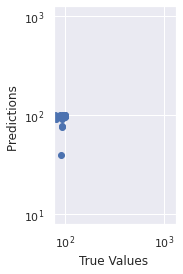

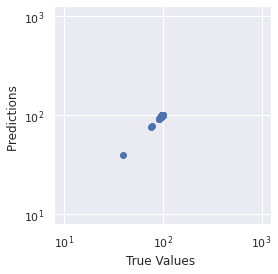

ScaledCART: -350.454651 (1072.343725)
pred =  98.70677700380509 Y =  98.23152668592834
denormalized pred =  98.78033576714478 denormalized Y =  98.33211777529581

pred =  96.9555108465053 Y =  100.0
denormalized pred =  97.12868195295101 denormalized Y =  100.0

pred =  99.24048373409184 Y =  92.70399663961032
denormalized pred =  99.28368515984823 denormalized Y =  93.11899466090398

pred =  98.47853988826789 Y =  90.98453378680796
denormalized pred =  98.56508082097551 denormalized Y =  91.4973351733625

pred =  98.6512968872773 Y =  98.96421960830335
denormalized pred =  98.72801136991188 denormalized Y =  99.02313498865837

pred =  98.73557313070803 Y =  98.6512968872773
denormalized pred =  98.80749396502063 denormalized Y =  98.72801136991188

pred =  96.68944269019241 Y =  98.70677700380509
denormalized pred =  96.87774780260617 denormalized Y =  98.78033576714478

pred =  99.97664305375658 Y =  99.24048373409184
denormalized pred =  99.9779716011812 denormalized Y =  99.2836851

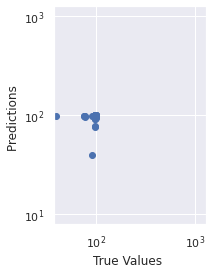

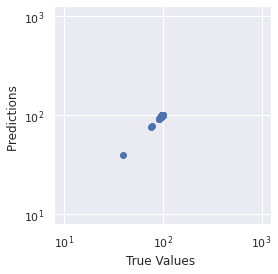

ScaledGBM: -305.995110 (1321.987899)
pred =  98.25661339272524 Y =  98.23152668592834
denormalized pred =  98.35577754556772 denormalized Y =  98.33211777529581

pred =  94.56372990192706 Y =  100.0
denormalized pred =  94.87294595110905 denormalized Y =  100.0

pred =  98.8600326378611 Y =  92.70399663961032
denormalized pred =  98.92487419237509 denormalized Y =  93.11899466090398

pred =  98.5381695835554 Y =  90.98453378680796
denormalized pred =  98.62131876816036 denormalized Y =  91.4973351733625

pred =  98.67170847264349 Y =  98.96421960830335
denormalized pred =  98.74726194052519 denormalized Y =  99.02313498865837

pred =  98.29348007744576 Y =  98.6512968872773
denormalized pred =  98.39054724643901 denormalized Y =  98.72801136991188

pred =  99.12580573470626 Y =  98.70677700380509
denormalized pred =  99.17553006628933 denormalized Y =  98.78033576714478

pred =  99.3633875644864 Y =  99.24048373409184
denormalized pred =  99.39959819762612 denormalized Y =  99.28368515

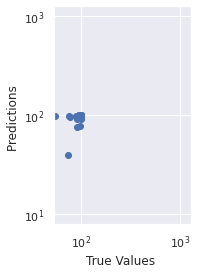

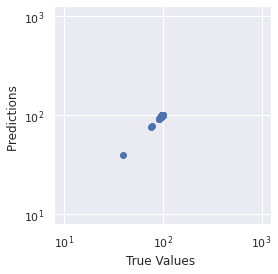

ScaledGBM: -316.531958 (1407.617215)
pred =  -1 Y =  98.23152668592834
denormalized pred =  4.74489869045505 denormalized Y =  98.33211777529581

pred =  -1 Y =  100.0
denormalized pred =  4.74489869045505 denormalized Y =  100.0

pred =  -1 Y =  92.70399663961032
denormalized pred =  4.74489869045505 denormalized Y =  93.11899466090398

pred =  -1 Y =  90.98453378680796
denormalized pred =  4.74489869045505 denormalized Y =  91.4973351733625

pred =  -1 Y =  98.96421960830335
denormalized pred =  4.74489869045505 denormalized Y =  99.02313498865837

pred =  -1 Y =  98.6512968872773
denormalized pred =  4.74489869045505 denormalized Y =  98.72801136991188

pred =  -1 Y =  98.70677700380509
denormalized pred =  4.74489869045505 denormalized Y =  98.78033576714478

pred =  -1 Y =  99.24048373409184
denormalized pred =  4.74489869045505 denormalized Y =  99.28368515984823

pred =  -1 Y =  97.3223578749032
denormalized pred =  4.74489869045505 denormalized Y =  97.47466265448713

pred =  -

IndexError: index 40 is out of bounds for axis 0 with size 40

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
import warnings
warnings.filterwarnings("ignore")
cpt = 0

cpt += 1
ind = np.concatenate(grouped_index[1:])
big_mat = frame.loc[ind].drop(columns=(['Population','Country'])).corr()
print(ind)
print(np.mean(frame.loc[ind]["Confirmed"]))
print(len(frame.loc[ind]["Confirmed"]))

current_frame = frame.loc[ind]
frame_food = current_frame.drop(columns=["Country", "Active", "Deaths", "Confirmed", "Population",
                             "Vegetal Products", "Animal Products", "Obesity",
                             "Confirmed_finish", "Recovered", "Deaths_percent"])

a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)

correlation = frame_food.corr(method='pearson')
columns = correlation.nlargest(10, name_y).index
correlation_map = np.corrcoef(frame_food[columns].values.T)

sns.set(font_scale=1.0)
heatmap = sns.heatmap(correlation_map, ax=ax, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=columns.values, xticklabels=columns.values)
print(correlation_map[0])
plt.show(ax)



X = frame_food[columns[0:]]
Y = X[name_y].values

a = 0
b = 100
print(columns)
d = Y
min_d = np.min(d)
max_d = np.max(d)
normalized_d = (b - a) * ((d - min_d) / (max_d - min_d)) + a

def denormalized(x):
    return (x / (b - a)) * (max_d - min_d) + min_d 



X = X.drop(name_y, axis = 1).values

Y = normalized_d
ind = Y != 0 

X = X[ind,]
Y = Y[ind]


a = 0
b = 100
print(columns)
d = Y
min_d = np.min(d)
max_d = np.max(d)
normalized_d = (b - a) * ((d - min_d) / (max_d - min_d)) + a

Y = normalized_d




pipelines = []
pipelines.append(('ScaledLR', Pipeline([('LR',LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('LASSO', Lasso())])))
pipelines.append(('ScaledLASSO', Pipeline([('LASSO', Ridge())])))
pipelines.append(('ScaledEN', Pipeline([('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledGBM', Pipeline([('GBM', GradientBoostingRegressor())])))
pipelines.append(('ScaledGBM', Pipeline([('RandomForestRegressor', RandomForestRegressor())])))


results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=10, random_state=21)
    kfold = LeaveOneOut()
    try:
        cv_results = cross_val_score(model, X, Y, cv=kfold, scoring='neg_mean_squared_error')
    except Exception as e:
        try :
            print("excemt",e, len(X))
            kfold = KFold(n_splits=int(len(X)/2), random_state=21)
            cv_results = cross_val_score(model, X, Y, cv=kfold, scoring='neg_mean_squared_error')
        except Exception as e2:
            print("excemt",e2, len(X))
            model.fit(X_train, Y_train)
            class tmp(): 
                content = {}
            cv_results = tmp()
            cv_results.mean = lambda : mean_squared_error(model.predict(X_train), Y_train)
            cv_results.std = lambda : -1


    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    pred = []
    for ind in range(len(X)):
        dataX = np.delete(X, ind, axis=0)
        dataY = np.delete(Y, ind, axis=0)
        try:
            model.fit(dataX, dataY)
            pred.append(model.predict(X[ind].reshape(1, -1))[0])
        except:
            pred = [-1 for i in Y]
    for ind in range(len(pred)):
        print("pred = ", pred[ind], "Y = ", Y[ind])
        print("denormalized pred = ", denormalized(pred[ind]), "denormalized Y = ", denormalized(Y[ind]))
        print()

    g=plt.scatter(pred, Y)
    #g=plt.scatter(denormalized(Y_train), denormalized(model.predict(X_train)))

    g.axes.set_yscale('log')
    g.axes.set_xscale('log')
    g.axes.set_xlabel('True Values ')
    g.axes.set_ylabel('Predictions ')
    g.axes.axis('equal')
    g.axes.axis('square')
    plt.show(g)

    g=plt.scatter(Y, Y)
    #g=plt.scatter(denormalized(Y_train), denormalized(model.predict(X_train)))

    g.axes.set_yscale('log')
    g.axes.set_xscale('log')
    g.axes.set_xlabel('True Values ')
    g.axes.set_ylabel('Predictions ')
    g.axes.axis('equal')
    g.axes.axis('square')
    plt.show(g)






# XGBregressor

[ 85 160 166  24 139 150  49 112 149  30 167  28  22 101  96  16 136  89
  93  59 113 151 143 128 156  99 110 127   3 104  82 169  92  36 130  34
  64 142  25 111  12  48 168  41 134  88  76 129  61  27   7  44   0 162
 148  62  79   4  54  94   2  57 117  98  69 163  11  32 165  75  50 121
  19  53 152 132 154 106  47  45 115  40  86  46  63  37  68  60  78 153
 107  58 100   9 103 144  70 133 119  84  43  56  65   1  39  15  17  13
 140  42  71 126  72  90 157 135  67  77 158  21  66  87  97 137  23  10
 145 125 122  74 159  35  95 123  18 114  55  31  33   8 116 124 108 138
  20 120  83   5 141 146  51 161 118  73   6  38  91 102  14]
0.9948662949208024
159
[1.         0.09657381 0.07490746 0.06373273 0.04426831 0.03245511
 0.03192727 0.02028179 0.01939285 0.01357571]


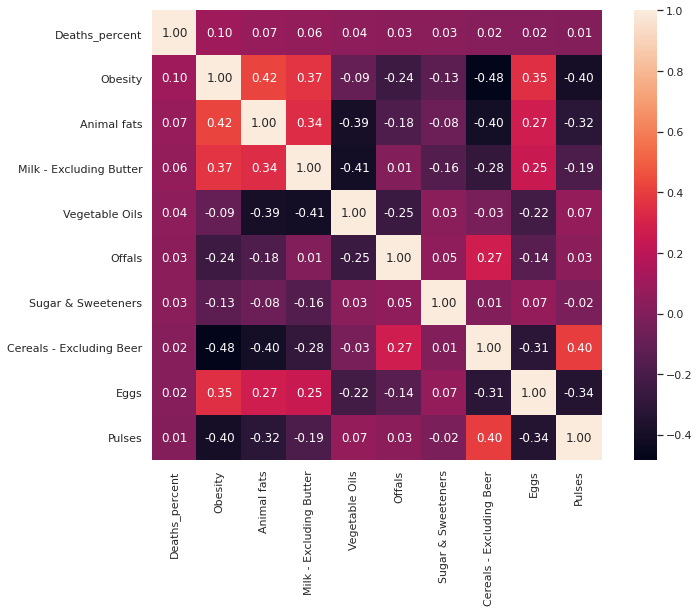

ValueError: With n_samples=0, test_size=0.1 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [124]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
import warnings
from xgboost import XGBRegressor
from sklearn.svm import SVC
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor

warnings.filterwarnings("ignore")
cpt = 0

cpt += 1
ind = np.concatenate(grouped_index[0:])
big_mat = frame.loc[ind].drop(columns=(['Population','Country'])).corr()
print(ind)
print(np.mean(frame.loc[ind]["Confirmed"]))
print(len(frame.loc[ind]["Confirmed"]))

current_frame = frame.loc[ind]
frame_food = current_frame.drop(columns=["Country", "Active", "Deaths", "Confirmed", "Population",
                             "Vegetal Products", "Animal Products",
                             "Confirmed_finish", "Recovered", "Recovered_percent"])

a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)

correlation = frame_food.corr(method='pearson')
columns = correlation.nlargest(10, name_y).index
correlation_map = np.corrcoef(frame_food[columns].values.T)

sns.set(font_scale=1.0)
heatmap = sns.heatmap(correlation_map, ax=ax, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=columns.values, xticklabels=columns.values)
print(correlation_map[0])
plt.show(ax)



X = frame_food[columns[0:]]
Y = X[name_y].values

ind = Y > 80 
Y = Y[ind]
X = X[ind]

Ynorm = (Y - np.mean(Y))/np.std(Y)
Ynorm = np.clip(Ynorm, -1, 1)

Xnorm = (X - np.mean(X))/np.std(X)
Xnorm = Xnorm.drop(columns=[name_y]) 

#Xnorm = np.clip(Xnorm, -1, 1)
from sklearn.model_selection import train_test_split # Import train_test_split function

#X_train, X_test, Y_train, Y_test = train_test_split (Xnorm, Ynorm, test_size = 0.10, random_state=42)
X_train, X_test, Y_train, Y_test = train_test_split (Xnorm, Ynorm, test_size = 0.10)


#model = XGBRegressor()
#model.fit(Xnorm, Ynorm, verbose=True)


In [125]:
Xnorm

Empty DataFrame
Columns: [Obesity, Animal fats, Milk - Excluding Butter, Vegetable Oils, Offals, Sugar & Sweeteners, Cereals - Excluding Beer, Eggs, Pulses]
Index: []

In [87]:
model = XGBRegressor()
model.fit(X_train, Y_train, verbose=True, eval_set=[(X_test,Y_test)])
  

[0]	validation_0-rmse:0.68282
[1]	validation_0-rmse:0.67910
[2]	validation_0-rmse:0.68635
[3]	validation_0-rmse:0.69203
[4]	validation_0-rmse:0.72319
[5]	validation_0-rmse:0.74953
[6]	validation_0-rmse:0.77039
[7]	validation_0-rmse:0.75628
[8]	validation_0-rmse:0.74987
[9]	validation_0-rmse:0.75657
[10]	validation_0-rmse:0.76183
[11]	validation_0-rmse:0.77560
[12]	validation_0-rmse:0.77431
[13]	validation_0-rmse:0.77687
[14]	validation_0-rmse:0.77691
[15]	validation_0-rmse:0.77979
[16]	validation_0-rmse:0.78221
[17]	validation_0-rmse:0.78237
[18]	validation_0-rmse:0.78232
[19]	validation_0-rmse:0.78177
[20]	validation_0-rmse:0.78087
[21]	validation_0-rmse:0.78126
[22]	validation_0-rmse:0.78075
[23]	validation_0-rmse:0.78105
[24]	validation_0-rmse:0.78199
[25]	validation_0-rmse:0.78241
[26]	validation_0-rmse:0.78396
[27]	validation_0-rmse:0.78396
[28]	validation_0-rmse:0.78506
[29]	validation_0-rmse:0.78487
[30]	validation_0-rmse:0.78507
[31]	validation_0-rmse:0.78496
[32]	validation_0-

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

import pickle


with open('model_perfimpressive.pkl', 'wb') as handle:
    pickle.dump(model, handle)
with open('Xtrainperfimpressive.pkl', 'wb') as handle:
    pickle.dump(X_train, handle)
with open('Ytrainperfimpressive.pkl', 'wb') as handle:
    pickle.dump(Y_train, handle)
with open('Xtestperfimpressive.pkl', 'wb') as handle:
    pickle.dump(X_test, handle)
with open('Ytestperfimpressive.pkl', 'wb') as handle:
    pickle.dump(Y_test, handle)


In [88]:
res = model.predict(X_test) 
for pred, TrueY in zip(res * np.std(Y) + np.mean(Y), Y_test * np.std(Y) + np.mean(Y)):
    print("pred :", pred, "TrueY :", TrueY)


pred : 98.6014 TrueY : 96.28981691994748
pred : 96.86308 TrueY : 99.10383791155269
pred : 96.65896 TrueY : 97.11300035423363
pred : 97.38631 TrueY : 98.454783104996
pred : 97.703445 TrueY : 98.04147465437815
pred : 97.44681 TrueY : 95.00402842520313
pred : 97.86796 TrueY : 95.00402842520313
pred : 97.30422 TrueY : 96.90941385435168
pred : 97.65916 TrueY : 99.14307004470993
pred : 96.81178 TrueY : 97.754798066123
pred : 97.48254 TrueY : 95.00402842520313
pred : 95.908356 TrueY : 97.76450972170579
pred : 96.81761 TrueY : 99.34427985554261
pred : 98.66328 TrueY : 98.92639734366318
pred : 98.64302 TrueY : 97.32119803769693
pred : 96.77389 TrueY : 97.83678756476701


In [89]:
res = model.predict(Xnorm) 
for pred, TueY in zip(res * np.std(Y) + np.mean(Y) , Y):
    print("pred :", pred, "TrueY :", TueY)


pred : 99.41892 TrueY : 99.99999999999999
pred : 97.44681 TrueY : 89.70588235294102
pred : 96.980736 TrueY : 96.98015530629853
pred : 99.421326 TrueY : 99.99999999999963
pred : 99.41905 TrueY : 99.99999999999986
pred : 99.41824 TrueY : 100.0
pred : 95.005646 TrueY : 94.11764705882351
pred : 95.00557 TrueY : 94.26699426699429
pred : 98.4223 TrueY : 98.42188321935826
pred : 95.00529 TrueY : 94.81419916449771
pred : 95.00517 TrueY : 93.51732991014127
pred : 97.32185 TrueY : 97.32283464566994
pred : 99.420166 TrueY : 99.99999999999949
pred : 95.48496 TrueY : 95.48655569782304
pred : 98.3596 TrueY : 98.36003051105995
pred : 96.09939 TrueY : 96.09910384818147
pred : 97.86796 TrueY : 94.18439716312047
pred : 96.70756 TrueY : 96.7075992169426
pred : 99.419525 TrueY : 100.00000000000014
pred : 98.142746 TrueY : 98.14276588949204
pred : 97.02923 TrueY : 97.02970297029695
pred : 95.00536 TrueY : 89.1042284866467
pred : 99.41838 TrueY : 100.0
pred : 98.161736 TrueY : 98.16395743187896
pred : 97.74

In [90]:
from sklearn.metrics import mean_squared_error
res = model.predict(X_test) 


mean_squared_error(res, Y_test )

0.6174164986149533

2.020068162131314


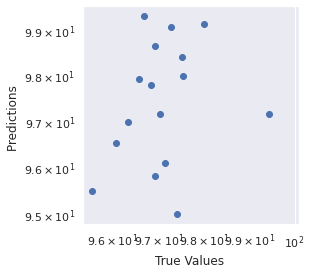

In [51]:
res = model.predict(X_test) 

print(mean_squared_error(res * np.std(Y) + np.mean(Y), Y_test * np.std(Y) + np.mean(Y)))
g = plt.scatter(res * np.std(Y) + np.mean(Y), Y_test * np.std(Y) + np.mean(Y))
#g=plt.scatter(denormalized(Y_train), denormalized(model.predict(X_train)))
g.axes.set_yscale('log')
g.axes.set_xscale('log')
g.axes.set_xlabel('True Values ')
g.axes.set_ylabel('Predictions ')
g.axes.axis('equal')
g.axes.axis('square')
plt.show(g)

0.21404989333104552


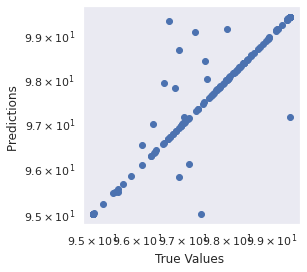

In [52]:
res = model.predict(Xnorm) 

print(mean_squared_error(res * np.std(Y) + np.mean(Y), Ynorm * np.std(Y) + np.mean(Y)))
g = plt.scatter(res * np.std(Y) + np.mean(Y), Ynorm * np.std(Y) + np.mean(Y))
#g=plt.scatter(denormalized(Y_train), denormalized(model.predict(X_train)))
g.axes.set_yscale('log')
g.axes.set_xscale('log')
g.axes.set_xlabel('True Values ')
g.axes.set_ylabel('Predictions ')
g.axes.axis('equal')
g.axes.axis('square')
plt.show(g)

# K-Fold

In [53]:
kfold = KFold(n_splits=10, random_state=21)
model = XGBRegressor()
  
cv_results = cross_val_score(model, Xnorm, Ynorm, cv=kfold, scoring='neg_mean_squared_error')
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)



ScaledGBM: -0.517500 (0.057084)


In [55]:
pred = []
for ind in range(len(Xnorm)):
    model = XGBRegressor()
    
    
    dataX = np.delete(Xnorm.values, ind, axis=0)
    dataY = np.delete(Ynorm, ind, axis=0)
    print(dataX.shape, dataY.shape)
    model.fit(dataX, dataY, verbose=False, eval_set=[(Xnorm.values[ind].reshape(1, -1), Ynorm[ind].reshape(1, -1))])
    pred.append(model.predict(Xnorm.values[ind].reshape(1, -1))[0])
    
for ind in range(len(pred)):
    print("pred = ", pred[ind], "Y = ", Y[ind])
    print("denormalized pred = ", denormalized(pred[ind]), "denormalized Y = ", denormalized(Y[ind]))
    print()

(150, 9) (150,)
(150, 9) (150,)
(150, 9) (150,)
(150, 9) (150,)
(150, 9) (150,)
(150, 9) (150,)
(150, 9) (150,)
(150, 9) (150,)
(150, 9) (150,)
(150, 9) (150,)
(150, 9) (150,)
(150, 9) (150,)
(150, 9) (150,)
(150, 9) (150,)
(150, 9) (150,)
(150, 9) (150,)
(150, 9) (150,)
(150, 9) (150,)
(150, 9) (150,)
(150, 9) (150,)
(150, 9) (150,)
(150, 9) (150,)
(150, 9) (150,)
(150, 9) (150,)
(150, 9) (150,)
(150, 9) (150,)
(150, 9) (150,)
(150, 9) (150,)
(150, 9) (150,)
(150, 9) (150,)
(150, 9) (150,)
(150, 9) (150,)
(150, 9) (150,)
(150, 9) (150,)
(150, 9) (150,)
(150, 9) (150,)
(150, 9) (150,)
(150, 9) (150,)
(150, 9) (150,)
(150, 9) (150,)
(150, 9) (150,)
(150, 9) (150,)
(150, 9) (150,)
(150, 9) (150,)
(150, 9) (150,)
(150, 9) (150,)
(150, 9) (150,)
(150, 9) (150,)
(150, 9) (150,)
(150, 9) (150,)
(150, 9) (150,)
(150, 9) (150,)
(150, 9) (150,)
(150, 9) (150,)
(150, 9) (150,)
(150, 9) (150,)
(150, 9) (150,)
(150, 9) (150,)
(150, 9) (150,)
(150, 9) (150,)
(150, 9) (150,)
(150, 9) (150,)
(150, 9)

In [56]:
import random
indexes = list(range(len(Xnorm)))
random.shuffle(indexes)


nb_split = 10

length = len(Xnorm)
middle_index = length//nb_split
prec = 0
list_ind = []
for i in range (1,nb_split):
    print(prec, middle_index*i)
    list_ind.append(indexes[prec : middle_index*i])
    prec = middle_index*i
list_ind.append(indexes[prec : ])


0 15
15 30
30 45
45 60
60 75
75 90
90 105
105 120
120 135


In [57]:

scores = []
Xnorm_nu = Xnorm.values
for i in range(len(list_ind)):
    model = XGBRegressor()
    sub = Xnorm.iloc[list_ind[i]].index
    print(np.delete(Ynorm, list_ind[i], axis=0).shape, np.delete(Ynorm, list_ind[i], axis=0).shape, Xnorm_nu[list_ind[i]].shape, Ynorm[list_ind[i]].shape)
    
    model.fit(np.delete(Xnorm_nu, list_ind[i], axis=0), np.delete(Ynorm, list_ind[i], axis=0), 
             verbose=False, eval_set=[(Xnorm_nu[list_ind[i]], Ynorm[list_ind[i]])])
    print(Xnorm_nu[list_ind[i]].shape, Ynorm[list_ind[i]].shape)

    scores.append(model.predict(Xnorm_nu[list_ind[i]]))

        
        


(136,) (136,) (15, 9) (15,)
(15, 9) (15,)
(136,) (136,) (15, 9) (15,)
(15, 9) (15,)
(136,) (136,) (15, 9) (15,)
(15, 9) (15,)
(136,) (136,) (15, 9) (15,)
(15, 9) (15,)
(136,) (136,) (15, 9) (15,)
(15, 9) (15,)
(136,) (136,) (15, 9) (15,)
(15, 9) (15,)
(136,) (136,) (15, 9) (15,)
(15, 9) (15,)
(136,) (136,) (15, 9) (15,)
(15, 9) (15,)
(136,) (136,) (15, 9) (15,)
(15, 9) (15,)
(135,) (135,) (16, 9) (16,)
(16, 9) (16,)


2.3211416919603804
0.4761030652860311


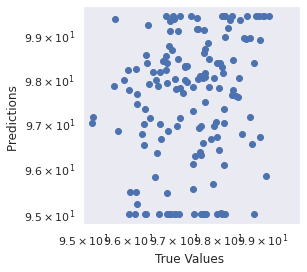

In [58]:
res = np.concatenate(scores)
TrueresY = Ynorm[indexes] 
print(mean_squared_error(res * np.std(Y) + np.mean(Y), TrueresY * np.std(Y) + np.mean(Y)))
print(mean_squared_error(res, TrueresY))
g = plt.scatter(res * np.std(Y) + np.mean(Y), TrueresY * np.std(Y) + np.mean(Y))
#g=plt.scatter(denormalized(Y_train), denormalized(model.predict(X_train)))
g.axes.set_yscale('log')
g.axes.set_xscale('log')
g.axes.set_xlabel('True Values ')
g.axes.set_ylabel('Predictions ') 
g.axes.axis('equal')
g.axes.axis('square')
plt.show(g)

In [132]:
0.000699

0.000699

# LeavOneOut

In [67]:
kfold = KFold(n_splits=10, random_state=21)
kfold = LeaveOneOut()
model = XGBRegressor()
  
cv_results = cross_val_score(model, Xnorm, Ynorm, cv=kfold, scoring='neg_mean_squared_error')
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)



ScaledGBM: -0.476933 (0.541293)


In [68]:
pred = []
for ind in range(len(Xnorm)):
    model = XGBRegressor()
    
    
    dataX = np.delete(Xnorm.values, ind, axis=0)
    dataY = np.delete(Ynorm, ind, axis=0)
    print(dataX.shape, dataY.shape)
    model.fit(dataX, dataY, verbose=False, eval_set=[(Xnorm.values[ind].reshape(1, -1), Ynorm[ind].reshape(1, -1))])
    pred.append(model.predict(Xnorm.values[ind].reshape(1, -1))[0])
    
for ind in range(len(pred)):
    print("pred = ", pred[ind], "Y = ", Y[ind])
    print("denormalized pred = ", denormalized(pred[ind]), "denormalized Y = ", denormalized(Y[ind]))
    print()

(150, 9) (150,)
(150, 9) (150,)
(150, 9) (150,)
(150, 9) (150,)
(150, 9) (150,)
(150, 9) (150,)
(150, 9) (150,)
(150, 9) (150,)
(150, 9) (150,)
(150, 9) (150,)
(150, 9) (150,)
(150, 9) (150,)
(150, 9) (150,)
(150, 9) (150,)
(150, 9) (150,)
(150, 9) (150,)
(150, 9) (150,)
(150, 9) (150,)
(150, 9) (150,)
(150, 9) (150,)
(150, 9) (150,)
(150, 9) (150,)
(150, 9) (150,)
(150, 9) (150,)
(150, 9) (150,)
(150, 9) (150,)
(150, 9) (150,)
(150, 9) (150,)
(150, 9) (150,)
(150, 9) (150,)
(150, 9) (150,)
(150, 9) (150,)
(150, 9) (150,)
(150, 9) (150,)
(150, 9) (150,)
(150, 9) (150,)
(150, 9) (150,)
(150, 9) (150,)
(150, 9) (150,)
(150, 9) (150,)
(150, 9) (150,)
(150, 9) (150,)
(150, 9) (150,)
(150, 9) (150,)
(150, 9) (150,)
(150, 9) (150,)
(150, 9) (150,)
(150, 9) (150,)
(150, 9) (150,)
(150, 9) (150,)
(150, 9) (150,)
(150, 9) (150,)
(150, 9) (150,)
(150, 9) (150,)
(150, 9) (150,)
(150, 9) (150,)
(150, 9) (150,)
(150, 9) (150,)
(150, 9) (150,)
(150, 9) (150,)
(150, 9) (150,)
(150, 9) (150,)
(150, 9)

denormalized pred =  5.909892469451146 denormalized Y =  97.93335747836744

pred =  0.21136323 Y =  99.13883360529708
denormalized pred =  5.887359352157883 denormalized Y =  99.18781690919008

pred =  0.10855356 Y =  97.754798066123
denormalized pred =  5.7903975174883096 denormalized Y =  97.88250556760556

pred =  0.010914713 Y =  98.19937271916098
denormalized pred =  5.698312387641883 denormalized Y =  98.3017927321084

pred =  0.052492112 Y =  98.67747440273018
denormalized pred =  5.73752485628239 denormalized Y =  98.75269990344157

pred =  0.1940577 Y =  97.8006799830003
denormalized pred =  5.871038170360397 denormalized Y =  97.92577771256023



In [69]:
pred = np.array(pred)
pred

array([ 0.5567726 , -0.32847625,  0.38787413,  0.5401288 ,  0.15690306,
       -0.00799358, -0.12282896, -0.274454  ,  0.5754272 ,  0.06440553,
       -0.25211132, -0.69880307,  0.8411999 , -0.47329062,  0.49638128,
       -0.3227728 , -0.22422397,  0.61703575,  0.7609999 ,  0.659103  ,
        0.37184626, -0.24540603,  0.12609187,  0.0460965 ,  0.45212683,
       -0.41548514,  0.18387946, -0.08859199, -0.2632379 ,  0.20842159,
        0.14747098, -0.1093241 , -0.18214744,  0.9349283 ,  0.05300519,
        0.23584196,  0.5368841 ,  0.5192152 ,  0.30376738,  0.6587344 ,
        0.4528335 , -0.47794372,  0.6068746 , -0.04177076,  0.29716623,
       -0.18484694,  0.6506715 , -0.47741926, -0.2153796 ,  0.08775389,
        0.3153552 , -0.01400584, -0.27642924, -0.21842563,  0.07662106,
       -0.10583144,  0.53684133,  0.13883352,  0.42796397, -0.25244796,
        0.39189887, -0.5348698 , -0.27320367,  0.77602845,  0.7684442 ,
        0.8375721 ,  0.07689795, -0.03689677,  0.98066866, -0.27

2.3251876795690385
0.47693292780240093


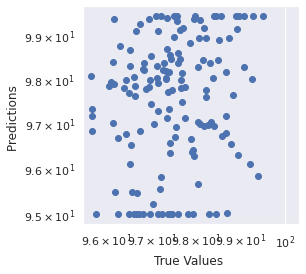

In [70]:
res = pred

print(mean_squared_error(res * np.std(Y) + np.mean(Y), Ynorm * np.std(Y) + np.mean(Y)))
print(mean_squared_error(res, Ynorm ))
g = plt.scatter(res * np.std(Y) + np.mean(Y), Ynorm * np.std(Y) + np.mean(Y))
#g=plt.scatter(denormalized(Y_train), denormalized(model.predict(X_train)))
g.axes.set_yscale('log')
g.axes.set_xscale('log')
g.axes.set_xlabel('True Values ')
g.axes.set_ylabel('Predictions ')
g.axes.axis('equal')
g.axes.axis('square')
plt.show(g)

In [64]:
0.003704601354095966

0.003704601354095966

In [59]:
np.delete(Xnorm, ind, axis=0)

Recovered_percent  Cereals - Excluding Beer  Oilcrops  Miscellaneous    Spices  Starchy Roots    Pulses    Offals  Fish, Seafood  Fruits - Excluding Wine
85            1.262661                  1.420737  0.629330       0.440232  1.578786       0.184978 -0.366169  0.591581       0.911927                 0.355369
160          -3.399515                 -0.101292  1.323479      -0.794929 -0.373353       1.245637  1.970246 -1.351195      -0.401654                -0.332801
166          -0.105018                 -0.256614  0.297146      -0.704894  0.696871      -0.450053 -0.524248  1.574662       0.308745                -0.176466
24            1.262661                  1.520131  1.305188       1.135185  0.423277       0.325629 -0.003113 -0.162836       4.282024                -0.362234
139           1.262661                 -0.454560  3.390859       0.585131 -0.232281       5.080753  0.643959 -0.926781       1.833023                 0.005907
150           1.262661                  1.769050  0.107232       0.769420 -0.342787      -0.167176  0.006372 -0.581187      -0.045868                 0.834225
49           -1.401440                 -0.943364  1.474820      -0.426350 -0.371215       0.302537  0.062227 -0.532683       0.679679                -0.543135
112          -1.333801                  2.460505  2.597999      -0.658470  0.091971      -0.507259  3.067581  0.239058      -0.743571                -0.364725
149           0.547937                 -0.623497  0.379656      -0.685199  3.108990      -0.450053 -0.459172 -0.542210       1.030664                -0.065412
30           -1.085973                 -0.604522 -0.321118       1.339169 -0.507157      -0.485741 -0.664148  2.792470       0.159389                -0.372876
28           -1.673322                  1.073981  3.445706      -0.671131 -0.651649      -0.128602  0.681635  4.943989      -0.196610                -0.558871
22            0.050181                  1.873616  2.224874      -0.586724 -0.446454      -0.537173  0.694545 -0.264176      -0.494041                -0.588078
101           1.262661                 -0.559156 -0.751736      -0.056365 -0.640535      -0.523790 -0.698136  4.466740      -0.854307                -0.590681
96           -0.781465                  2.351858  0.067224      -0.444638 -0.385750      -0.285785  0.716676  1.378912      -0.454248                -0.300085
16            0.519924                  0.048639  1.055892      -0.431977  4.899323       2.209205  0.995950 -0.531817       0.029450                -0.414309
136          -0.504043                 -0.415270  0.439971      -0.270197 -0.034138       0.540018  0.501951 -0.705047       0.404759                -0.342763
89           -1.371209                 -0.367629 -0.385313      -0.287078 -0.651649       0.171595 -0.630688 -0.177561      -0.492974                -0.474647
93           -0.228458                  2.663997  0.633261      -0.645809 -0.538578       2.922959  1.255200  0.850560      -0.176127                 0.920260
59            1.262661                 -0.950561  0.052637       0.987472  1.229953      -0.451103 -0.225214 -0.638353       0.483597                 2.580859
113           0.421525                  0.800478  0.323121      -0.652843  0.362787       2.677869  0.391559 -0.563864      -0.252405                -0.249596
151          -0.082578                  1.361662 -0.037508       0.334722 -0.174997       0.957249  1.623789 -0.733630      -0.278969                -0.567588
143          -3.672003                  0.361651  0.155404      -0.692233 -0.400712      -0.479968  0.356518  0.936309      -0.825289                -0.189824
128           1.262661                 -0.772370 -0.052120       1.229440 -0.212402      -0.512769 -0.319799 -0.283231      -0.109557                -0.231144
156           0.431123                 -0.339992  0.869254      -0.637368 -0.579831       0.864094  2.017143 -0.187955       0.031690                 0.172770
99            0.240320        

In [66]:
Xnorm


Cereals - Excluding Beer  Oilcrops  Miscellaneous    Spices  Starchy Roots    Pulses    Offals  Fish, Seafood  Fruits - Excluding Wine
85                   1.420737  0.629330       0.440232  1.578786       0.184978 -0.366169  0.591581       0.911927                 0.355369
160                 -0.101292  1.323479      -0.794929 -0.373353       1.245637  1.970246 -1.351195      -0.401654                -0.332801
166                 -0.256614  0.297146      -0.704894  0.696871      -0.450053 -0.524248  1.574662       0.308745                -0.176466
24                   1.520131  1.305188       1.135185  0.423277       0.325629 -0.003113 -0.162836       4.282024                -0.362234
139                 -0.454560  3.390859       0.585131 -0.232281       5.080753  0.643959 -0.926781       1.833023                 0.005907
150                  1.769050  0.107232       0.769420 -0.342787      -0.167176  0.006372 -0.581187      -0.045868                 0.834225
49                  -0.943364  1.474820      -0.426350 -0.371215       0.302537  0.062227 -0.532683       0.679679                -0.543135
112                  2.460505  2.597999      -0.658470  0.091971      -0.507259  3.067581  0.239058      -0.743571                -0.364725
149                 -0.623497  0.379656      -0.685199  3.108990      -0.450053 -0.459172 -0.542210       1.030664                -0.065412
30                  -0.604522 -0.321118       1.339169 -0.507157      -0.485741 -0.664148  2.792470       0.159389                -0.372876
28                   1.073981  3.445706      -0.671131 -0.651649      -0.128602  0.681635  4.943989      -0.196610                -0.558871
22                   1.873616  2.224874      -0.586724 -0.446454      -0.537173  0.694545 -0.264176      -0.494041                -0.588078
101                 -0.559156 -0.751736      -0.056365 -0.640535      -0.523790 -0.698136  4.466740      -0.854307                -0.590681
96                   2.351858  0.067224      -0.444638 -0.385750      -0.285785  0.716676  1.378912      -0.454248                -0.300085
16                   0.048639  1.055892      -0.431977  4.899323       2.209205  0.995950 -0.531817       0.029450                -0.414309
136                 -0.415270  0.439971      -0.270197 -0.034138       0.540018  0.501951 -0.705047       0.404759                -0.342763
89                  -0.367629 -0.385313      -0.287078 -0.651649       0.171595 -0.630688 -0.177561      -0.492974                -0.474647
93                   2.663997  0.633261      -0.645809 -0.538578       2.922959  1.255200  0.850560      -0.176127                 0.920260
59                  -0.950561  0.052637       0.987472  1.229953      -0.451103 -0.225214 -0.638353       0.483597                 2.580859
113                  0.800478  0.323121      -0.652843  0.362787       2.677869  0.391559 -0.563864      -0.252405                -0.249596
151                  1.361662 -0.037508       0.334722 -0.174997       0.957249  1.623789 -0.733630      -0.278969                -0.567588
143                  0.361651  0.155404      -0.692233 -0.400712      -0.479968  0.356518  0.936309      -0.825289                -0.189824
128                 -0.772370 -0.052120       1.229440 -0.212402      -0.512769 -0.319799 -0.283231      -0.109557                -0.231144
156                 -0.339992  0.869254      -0.637368 -0.579831       0.864094  2.017143 -0.187955       0.031690                 0.172770
99                  -0.402557 -0.388916       0.613267  0.086200      -0.568400 -0.066608 -0.874812       0.227666                -0.468307
110                 -1.000788 -0.273829      -0.794929 -0.468042      -0.453727 -0.522140 -0.830639      -0.196077                -0.293066
127                  0.098274  0.137264      -0.538893 -0.535158       5.043491  6.363802  0.696385      -0.208985                10.311714
3                    0.627957  0.221840      -0.361638 -0.629634       1.223333  0.13

In [67]:
type(Xnorm)

pandas.core.frame.DataFrame

In [54]:
X

KeyError: 2

In [71]:
for ind in range(len(X)):
    dataX = np.delete(X, ind, axis=0)
    dataY = np.delete(Y, ind, axis=0)
    try:
        model.fit(X_train, Y_train, verbose=True, eval_set=[(X_test,Y_test)])
        pred.append(model.predict(X[ind].reshape(1, -1))[0])
    except:
        pred = [-1 for i in Y]

ValueError: Shape of passed values is (150, 10), indices imply (151, 10)